In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv('../data/diabetic_data.csv')

# Data QA

In [3]:
# Order of columns

col_ord = ['encounter_id', 'patient_nbr', 'name', 'race', 'gender', 'age', 'weight', 'admission_type_id',
           'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code',
           'payer_code_2', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications',
           'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
           'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed',

           'glyburide', 'glyburide-metformin', 'glyburide-metformin_2', 'troglitazone', 'troglitazone_2',
           'metformin-pioglitazone', 'metformin-pioglitazone_2', 'metformin-rosiglitazone', 'rosiglitazone',
           'chlorpropamide', 'examide', 'tolazamide', 'citoglipton', 'miglitol', 'glipizide', 'insulin', 
           'glipizide-metformin', 'glimepiride', 'acarbose', 'acetohexamide', 'repaglinide', 'nateglinide',
           'glimepiride-pioglitazone', 'pioglitazone', 'tolbutamide', 'metformin',

           'out', 'US', 'readmitted']


df_diabetes = data_df[col_ord]
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223534 entries, 0 to 223533
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              223534 non-null  object
 1   patient_nbr               223534 non-null  object
 2   name                      223534 non-null  object
 3   race                      223534 non-null  object
 4   gender                    223534 non-null  object
 5   age                       223534 non-null  object
 6   weight                    223534 non-null  object
 7   admission_type_id         223534 non-null  object
 8   discharge_disposition_id  223534 non-null  object
 9   admission_source_id       223534 non-null  object
 10  time_in_hospital          223534 non-null  object
 11  payer_code                223534 non-null  object
 12  payer_code_2              223534 non-null  object
 13  medical_specialty         223534 non-null  object
 14  num_

## Limpieza de Datos

Como se ve en la anterior celda todas las columnas son de tipo object, por lo cual se procede a convertirlas en su tipo correspondiente, para ello se hace uso de la información que se tiene en el documento data_description.pdf.

Al momento de realizar el cambio de tipo se encuentra que en columnas de tipo int hay valores atípicos como 'abcde' en la columna 'encounter_id', se procede a revisar esta fila y se encuentra que todos los valores son iguales por lo cual se eliminan.

Seguido se hace uso de la función 'check_column_type' para revisar que columnas tienen más de un tipo de datos para así trabajar directamente en ellas. Se encuentra que la mayoria de las columnas tienen datos de tipo 'int' junto a tipo 'str', un error comun al momento de insertar datos.

Se estudia el significado de cada varible que tiene más de un tipo y se determina cual es el tipo correcto para asignarle.

Durante el análisis de cada columna se identifica que hay unas columnas que son identicas a otras por lo cual se hace uso de la función 'equal_columns' para establecer que columnas son repetidas y comparando con la información del documento data_description.pdf se define las columnas a eliminar.

Se encuentra que algunos valores en las columnas son *'?'* y se usan para representar valores nulos por lo que se mapea pasandolos a np.nan

Se procede a realizar un mapeo de las columnas 'gender', 'weight', 'admission_type_id', 'discharge_disposition_id' y 'admission_source_id' donde se encuentra que:

- La columna 'gender' tienen entre sus valores *Unknown/Invalid* que se tomará como np.nan

- La columnas weight se define las entradas nulas con el valor '?' por tanto se decide cambiar el signo por un np.nan

- Revisando el documento IDS_mapping.csv se valida que los ids [8, 6, 5] en la columna 'admission_type_id' corresponde a valores nulos, no disponibles o no mapeados por ello se mapean con np.nan

- En el contexto médico, discharge_disposition, hace referencia a como se dispone el paciente después del alta médica. Entre las opciones se encuentra 'Expired' que el terminó usado para referirse a pacientes que fallecieron. Con lo anterior se revisa en el documento IDS_mapping.csv y los id [11, 19, 20, 21] cuyas descripciones se refieren a un paciente fallecido se eliminan de la data ya que el objetivo es predecir que el paciente sea readmitido en menos de 30 días. Además se encuentra que hay ids [18, 25, 26] con descripciones de nulos, no mapeados y desconocido/invalido por lo que se decide mapear estos indices con np.nan

- Para la columna 'admission_source_id' se encuentran los ids [21, 20, 17, 15, 9] que tienen como descirpción nulo, no disponible, no mapeados y desconocido/invalido por lo mismo se mapean como np.nan

Posteriormente se realiza el análisis de valores nulos con el cual se descartan aquellas columnas que superen un 80% de valores nulos.

In [4]:
# check abcde rows
df_diabetes[df_diabetes['patient_nbr'] == 'abcde']

,encounter_id,patient_nbr,name,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,acetohexamide,repaglinide,nateglinide,glimepiride-pioglitazone,pioglitazone,tolbutamide,metformin,out,US,readmitted
101766,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,...,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde
203533,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,...,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde
221610,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,...,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde,abcde


In [5]:
# drop abcde rows
df_diabetes.drop(df_diabetes[(df_diabetes['out'] == 'abcde')].index, inplace=True)
df_diabetes.reset_index(drop=True)
df_diabetes.shape

(223531, 57)

In [6]:
def check_column_type(df):
    df_list = []
    for col in df.columns:
        first_type = type(df[col].iloc[0])
        #same = df[col].apply(lambda x: isinstance(x, first_type)).all()
        types = df[col].apply(type).unique()

        df_list.append([col, types])

    fin = pd.DataFrame(df_list, columns=['column', 'types'])

    return fin

check_column_type(df_diabetes)


,column,types
0,encounter_id,"[<class 'int'>, <class 'str'>]"
1,patient_nbr,"[<class 'int'>, <class 'str'>]"
2,name,[<class 'str'>]
3,race,[<class 'str'>]
4,gender,[<class 'str'>]
5,age,[<class 'str'>]
6,weight,[<class 'str'>]
7,admission_type_id,"[<class 'int'>, <class 'str'>]"
8,discharge_disposition_id,"[<class 'int'>, <class 'str'>]"
9,admission_source_id,"[<class 'int'>, <class 'str'>]"


In [7]:
# check unique values

unique_val = df_diabetes['US'].value_counts()
print(len(unique_val))
unique_val

2


US
1    180224
1     43307
Name: count, dtype: int64

In [8]:
# check distinct types for column
col_name = 'US'
filtered_df = df_diabetes[df_diabetes[col_name].apply(lambda x: isinstance(x, int))]
filtered_df[['encounter_id', 'patient_nbr', col_name]]

,encounter_id,patient_nbr,US
0,2278392,8222157,1
1,149190,55629189,1
2,64410,86047875,1
3,500364,82442376,1
4,16680,42519267,1
...,...,...,...
196603,353165132,93695949,1
196604,353165162,107155647,1
196605,353165312,89400798,1
196606,353173046,35227134,1


In [9]:
# asign the columns types

df_diabetes['patient_nbr'] = df_diabetes['patient_nbr'].astype(str)
df_diabetes['encounter_id'] = df_diabetes['encounter_id'].astype(str)
df_diabetes['time_in_hospital'] = df_diabetes['time_in_hospital'].astype(int)
df_diabetes['num_lab_procedures'] = df_diabetes['num_lab_procedures'].astype(int)
df_diabetes['num_procedures'] = df_diabetes['num_procedures'].astype(int)
df_diabetes['num_medications'] = df_diabetes['num_medications'].astype(int)
df_diabetes['number_outpatient'] = df_diabetes['number_outpatient'].astype(int)
df_diabetes['number_emergency'] = df_diabetes['number_emergency'].astype(int)
df_diabetes['number_inpatient'] = df_diabetes['number_inpatient'].astype(int)
df_diabetes['number_diagnoses'] = df_diabetes['number_diagnoses'].astype(int)

df_diabetes['US'] = df_diabetes['US'].astype(int)
df_diabetes['admission_type_id'] = df_diabetes['admission_type_id'].astype(str)
df_diabetes['admission_source_id'] = df_diabetes['admission_source_id'].astype(str)
df_diabetes['discharge_disposition_id'] = df_diabetes['discharge_disposition_id'].astype(str)

### Filas duplicadas

In [10]:
# check duplicate rows
duplicate_rows = df_diabetes[df_diabetes.duplicated(keep=False)]
#duplicate_rows.sort_values(by='patient_nbr')
duplicate_rows.groupby(['encounter_id'])['patient_nbr'].count().sort_values(ascending=False)

encounter_id
263924304    3
60354450     3
150724950    3
60355158     3
60355236     3
            ..
188179026    2
188175006    2
188170146    2
18814860     2
99993774     2
Name: patient_nbr, Length: 101766, dtype: int64

In [11]:
# drop duplicate rows

print('Number of rows before removing duplicates:', df_diabetes.shape[0])
df_diabetes.drop_duplicates(inplace=True)
print('Number of rows after removing duplicates:', df_diabetes.shape[0])

Number of rows before removing duplicates: 223531
Number of rows after removing duplicates: 101766


### Columnas duplicadas

In [12]:
# check for duplicate columns
def equal_columns(df):
    equal_cols = []
    cols = df.columns
    for i in range(len(cols)-1):
        for j in range(i+1,len(cols)):
            col1 = cols[i]
            col2 = cols[j]
            if df[col1].equals(df[col2]):
                equal_cols.append(col1)
                equal_cols.append(col2)
                print(f'the columns {col1} and {col2} are equal')
    return equal_cols

duplicate_cols = equal_columns(df_diabetes)

the columns payer_code and payer_code_2 are equal
the columns glyburide-metformin and glyburide-metformin_2 are equal
the columns troglitazone and troglitazone_2 are equal
the columns metformin-pioglitazone and metformin-pioglitazone_2 are equal
the columns examide and citoglipton are equal


In [13]:
# drop duplicate columns

delete_cols = ['payer_code_2', 'glyburide-metformin_2', 'troglitazone_2',
               'metformin-pioglitazone_2', 'citoglipton']

df_diabetes.drop(delete_cols, axis=1, inplace=True)

### Manejo de datos faltantes

In [14]:
# NaN mapping

df_diabetes.replace('?', np.nan , inplace=True)

# NaN mapping for gender
df_diabetes['gender'] = df_diabetes['gender'].replace('Unknown/Invalid', np.nan)

# NaN mapping for admission_type_id [8, 6, 5]
df_diabetes = df_diabetes.replace({'admission_type_id' : { '8' : np.nan, '6' : np.nan, '5' : np.nan}})

# NaN mapping for admission_source_id [21, 20, 17, 15, 9]
df_diabetes = df_diabetes.replace({'admission_source_id' : { '21' : np.nan, '20' : np.nan, '17' : np.nan, '15' : np.nan, '9' : np.nan}})

# NaN mapping for discharge_disposition_id [18, 25, 26]
df_diabetes = df_diabetes.replace({'discharge_disposition_id' : { '18' : np.nan, '25' : np.nan, '26' : np.nan}})

# Expired patient mapping
expired = ['11', '19', '20', '21']
df_diabetes = df_diabetes[~df_diabetes['discharge_disposition_id'].isin(expired)]


In [15]:
# check for null values and unique values
def check_unique_nulls(df_diabetes):
    columns = []
    unique = []
    nulls = []
    total = len(df_diabetes)

    for col in df_diabetes.columns:
        columns.append(col)
        unique.append(df_diabetes[col].nunique())
        nulls.append(df_diabetes[col].isnull().sum())

    df_nulls = pd.DataFrame({'column':columns, 'unique':unique, 'nulls':nulls}).sort_values(by='unique')
    df_nulls['nullPercentage'] = round(df_nulls['nulls']/total*100, 0)
    return df_nulls


check_unique_nulls(df_diabetes)

,column,unique,nulls,nullPercentage
49,out,0,100114,100.0
2,name,1,0,0.0
50,US,1,0,0.0
34,examide,1,0,0.0
25,change,2,0,0.0
47,tolbutamide,2,0,0.0
4,gender,2,3,0.0
45,glimepiride-pioglitazone,2,0,0.0
42,acetohexamide,2,0,0.0
39,glipizide-metformin,2,0,0.0


In [16]:
# drop columns with only one value and with null values >= 40%

df_only_null = check_unique_nulls(df_diabetes)

only = df_only_null[df_only_null['unique'] == 1]['column'].to_list()
print(f'cols with only one value: {only}')
print('-----------------------')
nulls_40 = df_only_null[df_only_null['nullPercentage'] >= 40]['column'].to_list()
print(f'cols with null values >= 40%: {nulls_40}')
del_col = only + nulls_40
df_diabetes = df_diabetes.drop(del_col, axis=1)
print('-----------------------')
print('Columns successfully deleted')

cols with only one value: ['name', 'US', 'examide']
-----------------------
cols with null values >= 40%: ['out', 'A1Cresult', 'max_glu_serum', 'weight', 'payer_code', 'medical_specialty']
-----------------------
Columns successfully deleted


In [17]:
# drop null values

print('Number of rows before removing duplicates:', df_diabetes.shape[0])
df_diabetes = df_diabetes.dropna()
print('Number of rows after removing duplicates:', df_diabetes.shape[0])

Number of rows before removing duplicates: 100114
Number of rows after removing duplicates: 81817


# Feature Engineering

Se procede al análisis especifico de las features

- primero se revisa aquellas que tienen un valor unico de entrada y aquellas que poseen nulls. Las columnas 'name', 'examide' y 'US' al tener un solo valor no aportan al entrnamiento del modelo por ello se eliminan.

## Feature Transformation

In [18]:
# Modification of target

df_diabetes['readmitted'] = df_diabetes['readmitted'].map({'<30': 1, 'NO': 0, '>30': 0})

target = df_diabetes['readmitted'].value_counts()
target = target.reset_index(drop=False)
target['%'] = round(target['count']/sum(target['count'])*100, 2)
target

,readmitted,count,%
0,0,72420,88.51
1,1,9397,11.49


In [19]:
# Simplification of variables

df_diabetes['change'] = df_diabetes['change'].map({'Ch': 1, 'No': 0})
df_diabetes['gender'] = df_diabetes['gender'].map({'Female': 0, 'Male': 1})
df_diabetes['diabetesMed'] = df_diabetes['diabetesMed'].map({'Yes': 1, 'No': 0})


medications = ['glyburide', 'glyburide-metformin','troglitazone', 
               'metformin-pioglitazone', 'metformin-rosiglitazone',
               'rosiglitazone', 'chlorpropamide', 'tolazamide', 'miglitol',
               'glipizide', 'insulin', 'glipizide-metformin', 'glimepiride',
               'acarbose', 'acetohexamide', 'repaglinide', 'nateglinide',
               'glimepiride-pioglitazone', 'pioglitazone', 'tolbutamide', 'metformin']

for med in medications:
    df_diabetes[med] = df_diabetes[med].map({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})


df_diabetes['age'] = df_diabetes['age'].map({'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, 
                                             '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, 
                                             '[80-90)': 8, '[90-100)': 9})


In [20]:
# mapping diag_1, diag_2, diag_3
def map_diagnosis(df, column):
    diagnosis = pd.to_numeric(df[column], errors='coerce')
    numeric_diagnosis = diagnosis[diagnosis.apply(type) == float]

    # Mapeo de diagnósticos basado en los rangos y valores proporcionados por el paper
    conditions = [
        numeric_diagnosis.between(390, 459) | (numeric_diagnosis == 785),
        numeric_diagnosis.between(460, 519) | (numeric_diagnosis == 786),
        numeric_diagnosis.between(520, 579) | (numeric_diagnosis == 787),
        numeric_diagnosis.between(250.00, 250.99),
        numeric_diagnosis.between(800, 999),
        numeric_diagnosis.between(710, 739),
        numeric_diagnosis.between(580, 629) | (numeric_diagnosis == 788),
        numeric_diagnosis.between(140, 239)
    ]

    # Categorías
    categories = [
        'Circulatory',
        'Respiratory',
        'Digestive',
        'Diabetes',
        'Injury',
        'Musculoskeletal',
        'Genitourinary',
        'Neoplasms'
    ]

    new_col_name = f'categories_{column}'
    df[new_col_name] = 'Other'

    for condition, category in zip(conditions, categories):
        df.loc[df.index.isin(numeric_diagnosis[condition].index), new_col_name] = category

for col in ['diag_1', 'diag_2', 'diag_3']:
    map_diagnosis(df_diabetes, col)

## Feature Creation

In [21]:
# Number of unique diagnoses

def count_unique_diagnoses(row):
    diagnoses = [row['categories_diag_1'], row['categories_diag_2'], row['categories_diag_3']]
    return len(set(diagnoses))

df_diabetes['distinctDiagnoses'] = df_diabetes.apply(count_unique_diagnoses, axis=1)


# Number of medications used

def count_medications(row):
    medications = sum([row['glyburide'], row['glyburide-metformin'], row['troglitazone'], 
                  row['metformin-pioglitazone'], row['metformin-rosiglitazone'],
                  row['rosiglitazone'], row['chlorpropamide'], row['tolazamide'], row['miglitol'],
                  row['glipizide'], row['insulin'], row['glimepiride'],
                  row['acarbose'], row['acetohexamide'], row['repaglinide'], row['nateglinide'],
                  row['glimepiride-pioglitazone'], row['pioglitazone'], row['tolbutamide'], row['metformin']])
    return medications

df_diabetes['numberOfMedications'] = df_diabetes.apply(count_medications, axis=1)

## Feature Selection

In [22]:
df_diabetes.head(10).T

,1,2,3,4,5,6,7,8,9,10
encounter_id,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236
patient_nbr,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,0,0,1,1,1,1,1,0,0,0
age,1,2,3,4,5,6,7,8,9,4
admission_type_id,1,1,1,1,2,3,1,2,3,1
discharge_disposition_id,1,1,1,1,1,1,1,1,3,1
admission_source_id,7,7,7,7,2,2,7,4,4,7
time_in_hospital,3,2,2,1,3,4,5,13,12,9
num_lab_procedures,59,11,44,51,31,70,73,68,33,47


In [52]:
def graph_normalize_column(df, column, target_column):

    df = df.groupby(column)[target_column].value_counts().reset_index(drop=False)
    df_1 = df[df[target_column] == 1]
    df_2 = df[df[target_column] == 0]
    df_1['proportion'] = df_1['count'] / df_1['count'].sum()
    df_2['proportion'] = df_2['count'] / df_2['count'].sum()
    df = pd.concat([df_1, df_2], axis=0)


    plt.figure(figsize=(15, 6))
    ax = sns.barplot(data=df, x=column, y='proportion', hue=target_column, palette='magma')
    #ax = sns.lineplot(data=df, x='number_inpatient', y='proportion', hue='readmitted', palette='magma')

    plt.title(f'{column} VS. {target_column} (Normalized)', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Proportion', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color=p.get_facecolor(),
                    xytext=(0, 30),
                    textcoords='offset points',
                    rotation=90)

    plt.legend(title=target_column, title_fontsize='13', fontsize='12')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

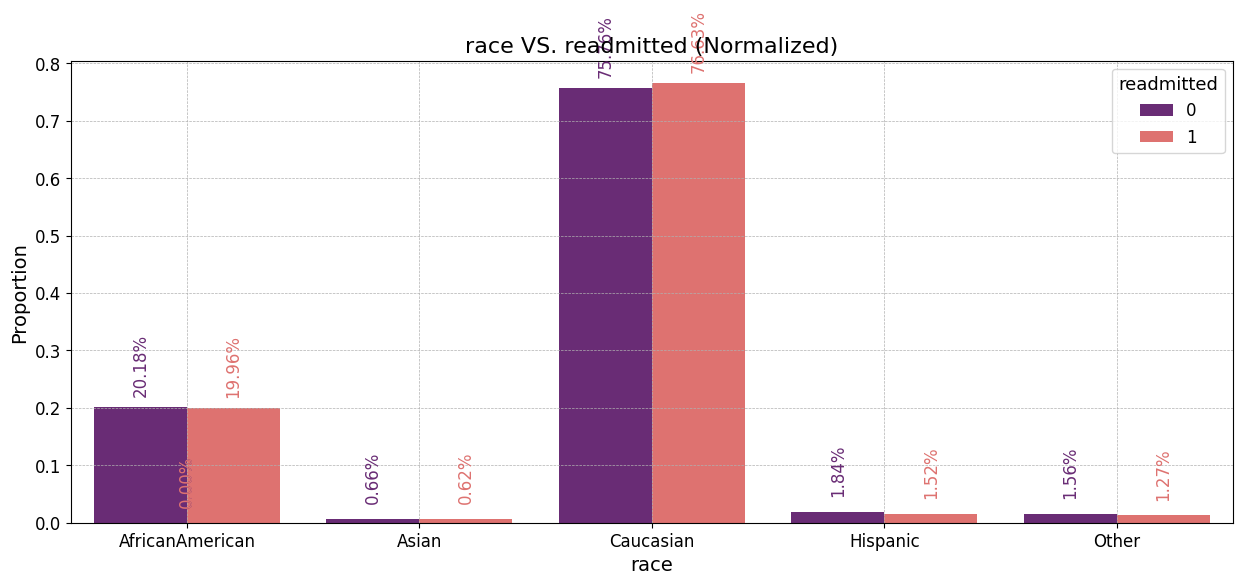

In [53]:
graph_normalize_column(df_diabetes, 'race', 'readmitted')

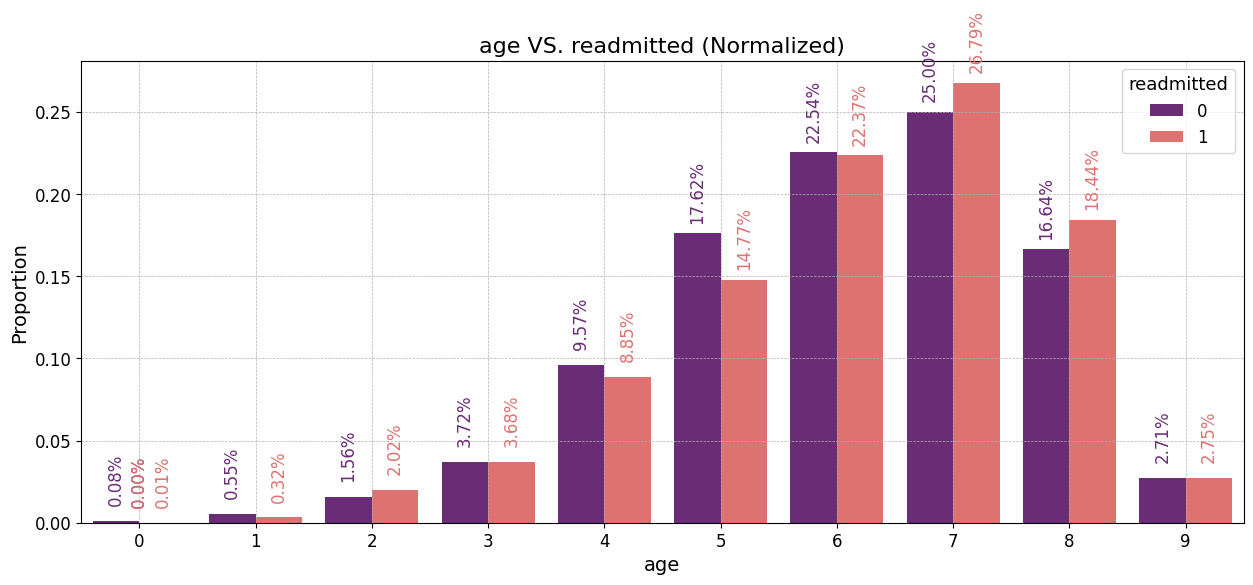

In [54]:
graph_normalize_column(df_diabetes, 'age', 'readmitted')

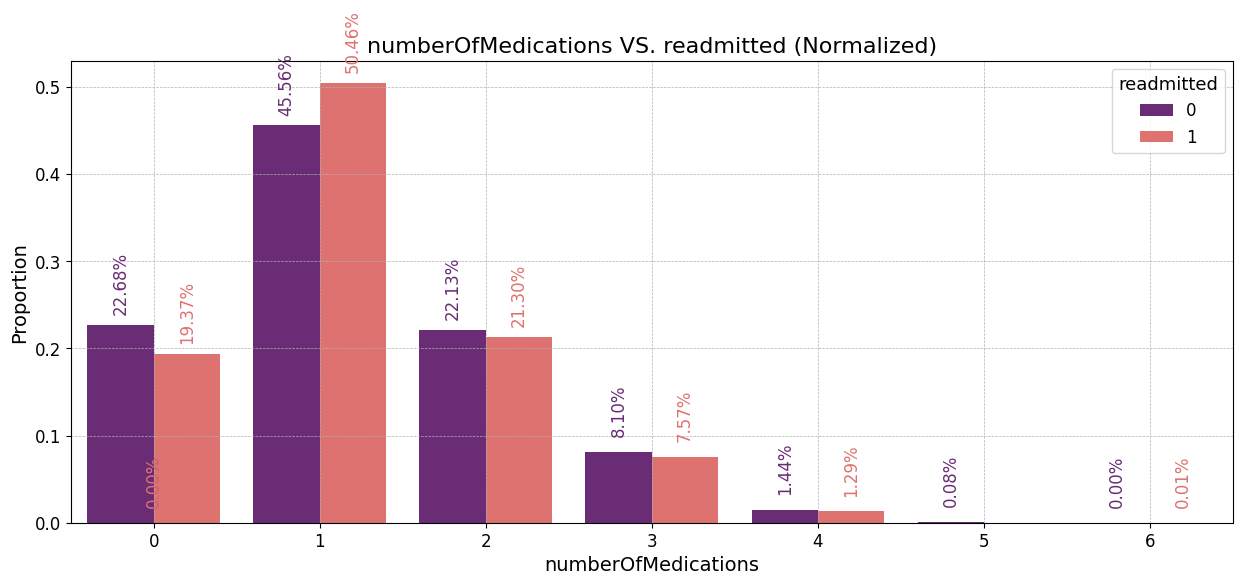

In [47]:
graph_normalize_column(df_diabetes, 'numberOfMedications', 'readmitted')

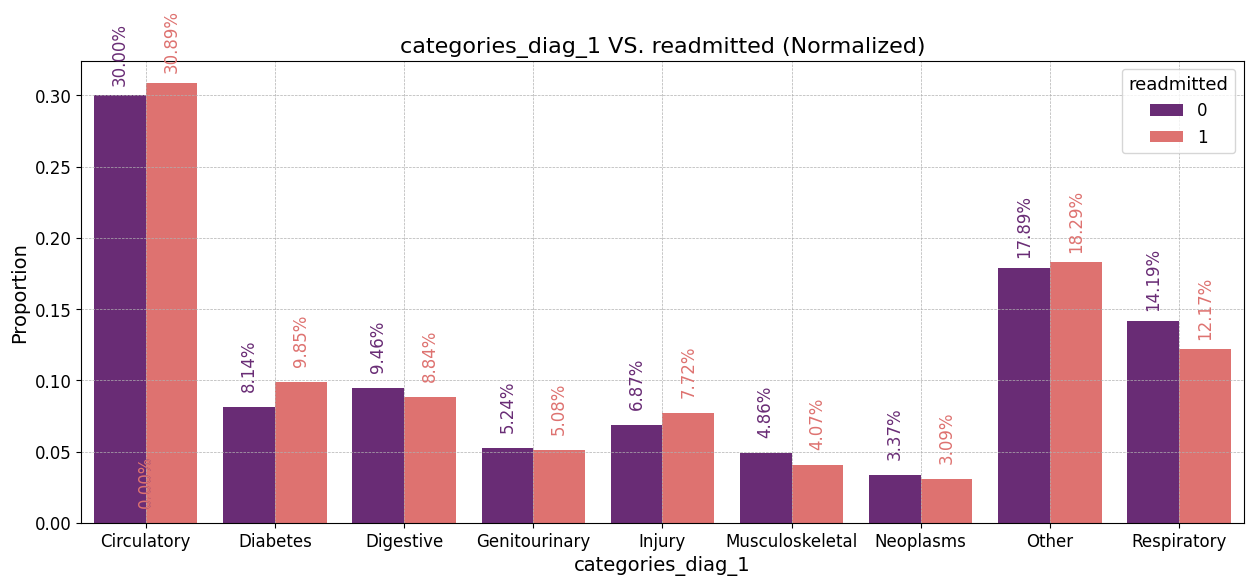

In [48]:
graph_normalize_column(df_diabetes, 'categories_diag_1', 'readmitted')

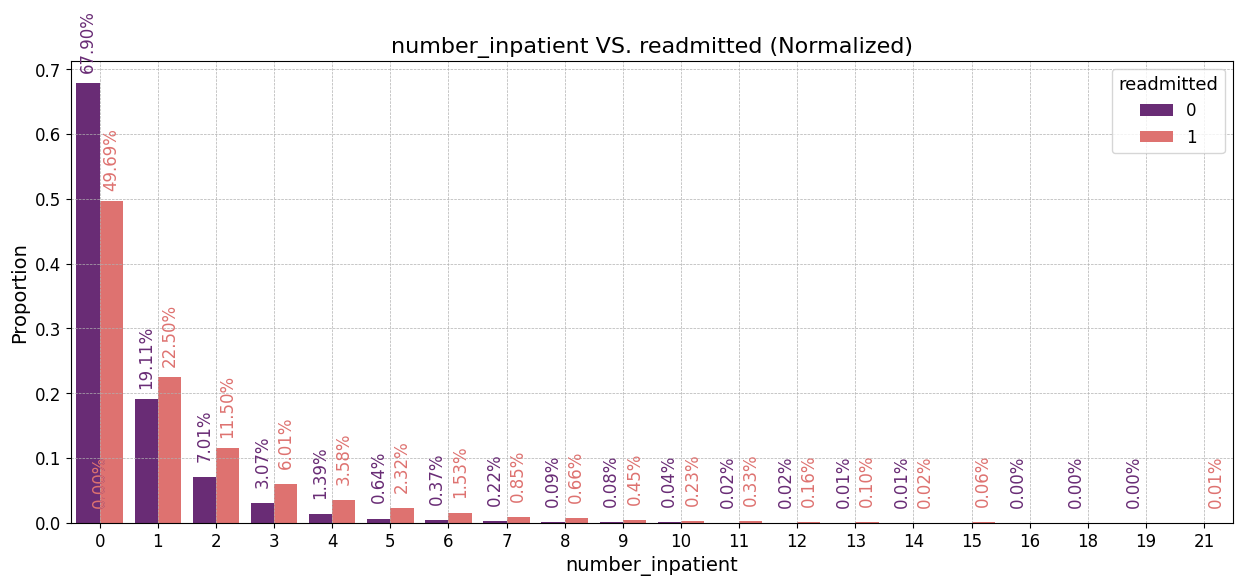

In [50]:
graph_normalize_column(df_diabetes, 'number_inpatient', 'readmitted')

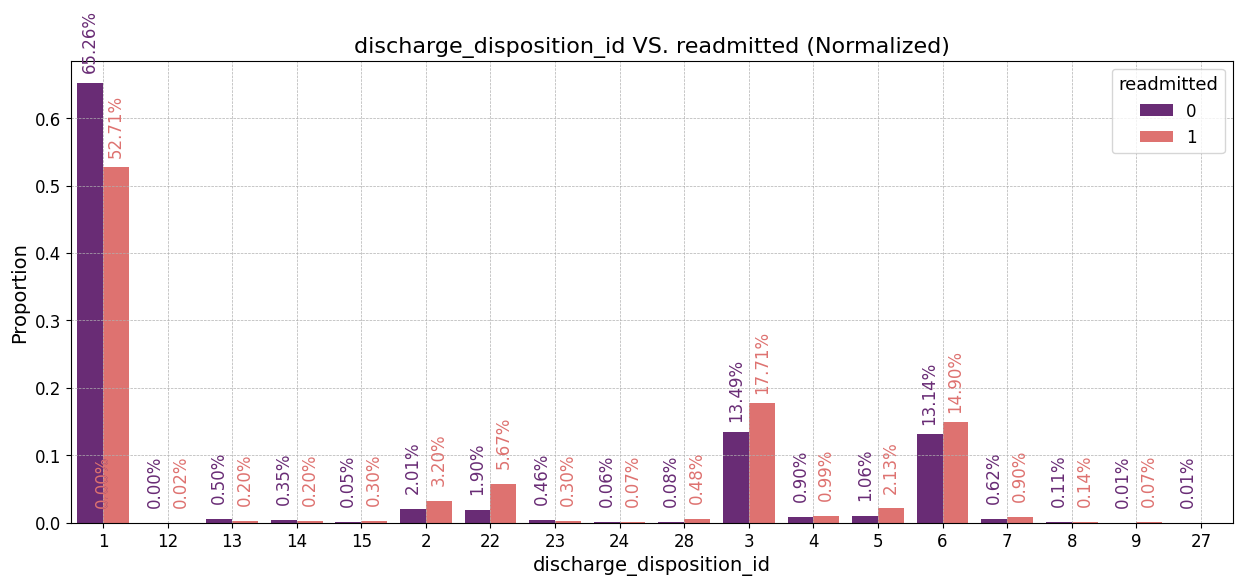

In [51]:
graph_normalize_column(df_diabetes, 'discharge_disposition_id', 'readmitted')

             gender
count  81817.000000
mean       0.459073
std        0.498325
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


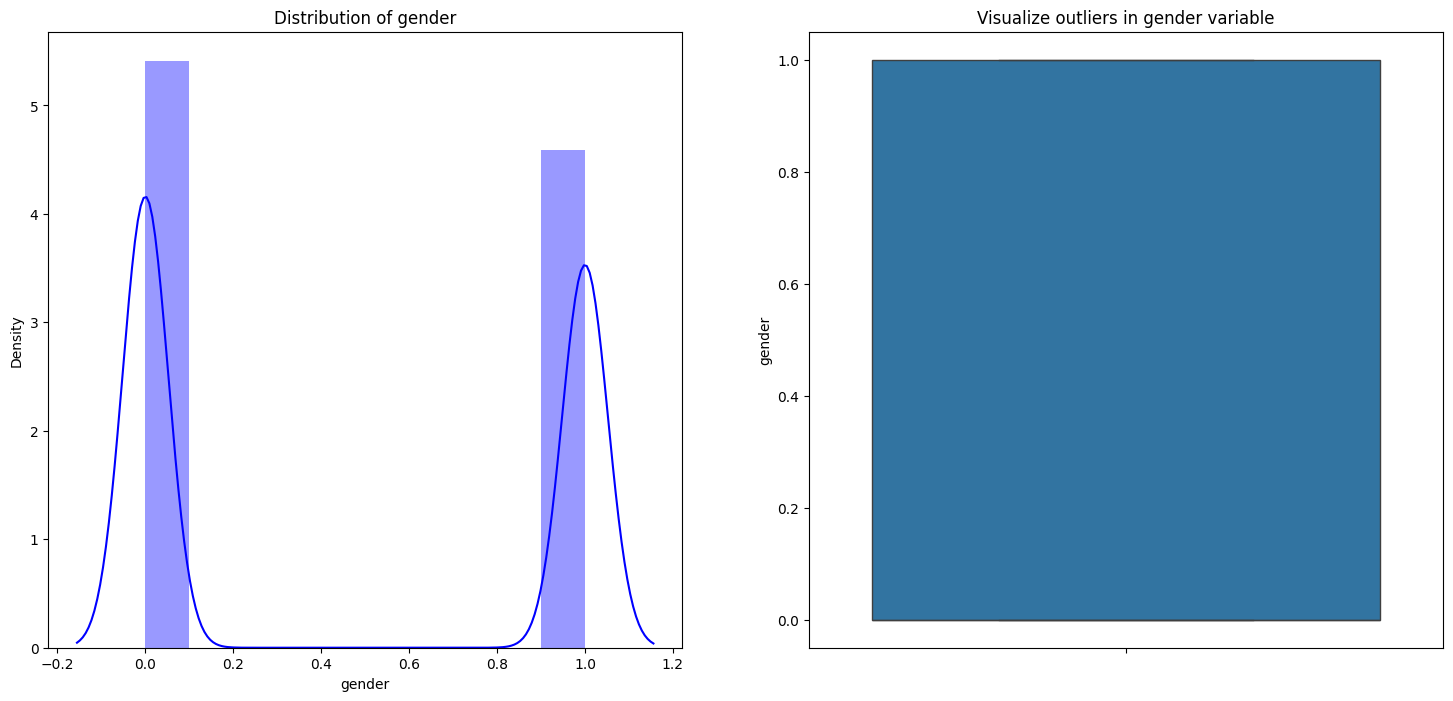

                age
count  81817.000000
mean       6.101018
std        1.569408
min        0.000000
25%        5.000000
50%        6.000000
75%        7.000000
max        9.000000


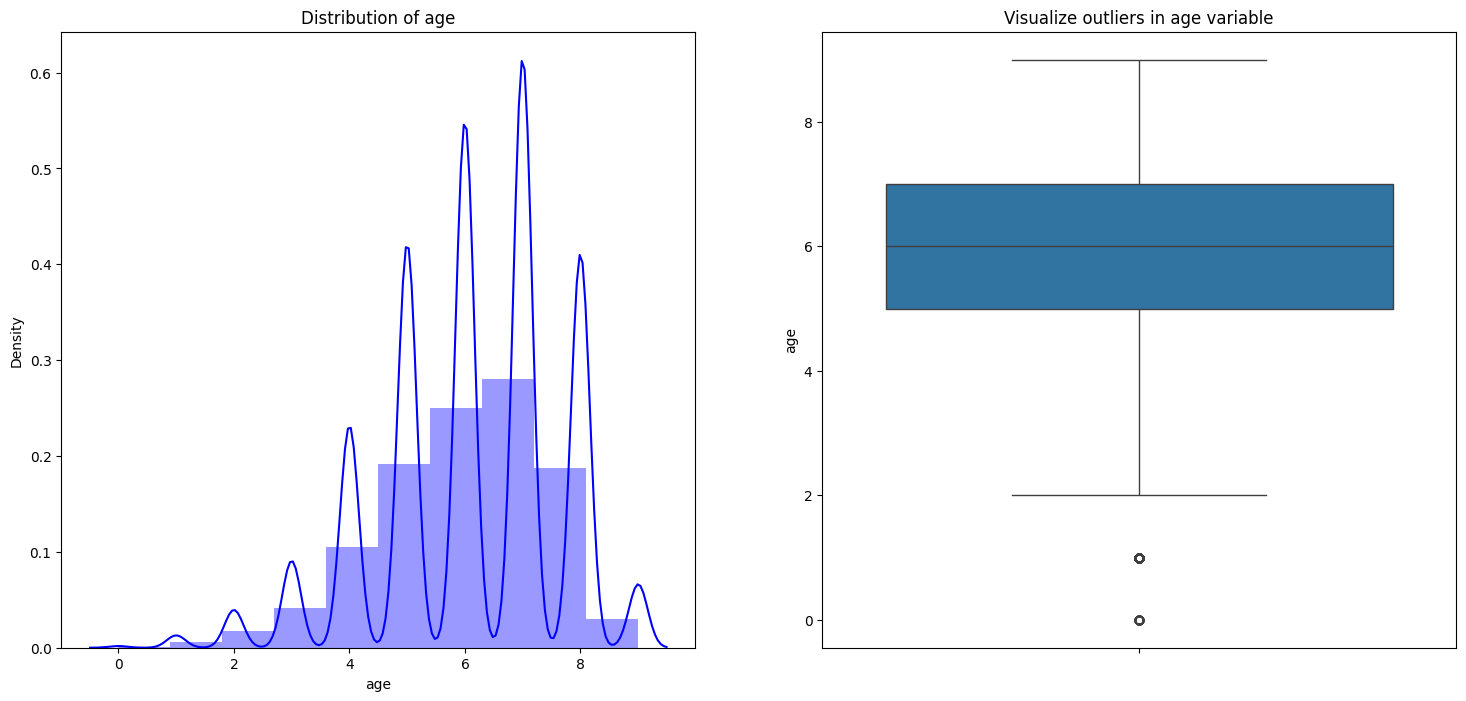

       time_in_hospital
count      81817.000000
mean           4.399110
std            2.971149
min            1.000000
25%            2.000000
50%            4.000000
75%            6.000000
max           14.000000


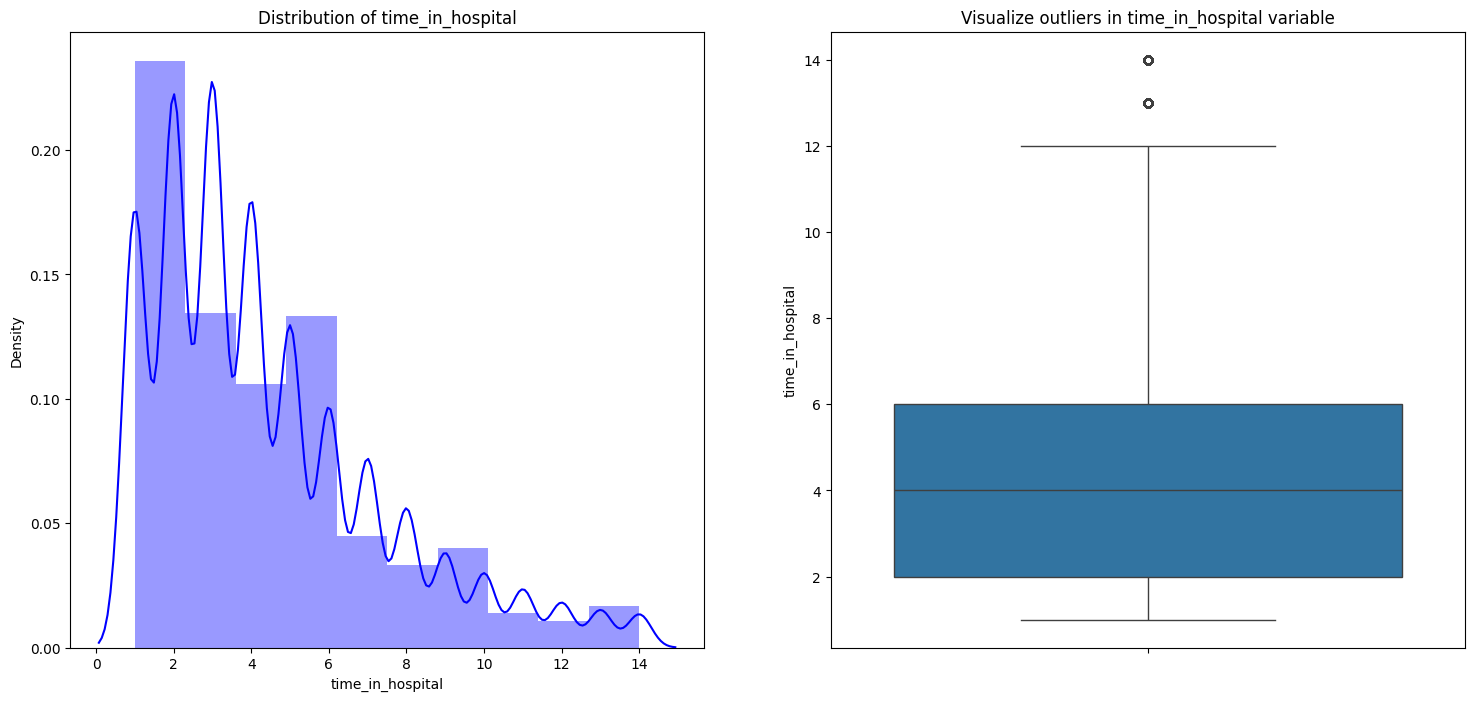

       num_lab_procedures
count        81817.000000
mean            43.545046
std             19.360371
min              1.000000
25%             33.000000
50%             44.000000
75%             57.000000
max            132.000000


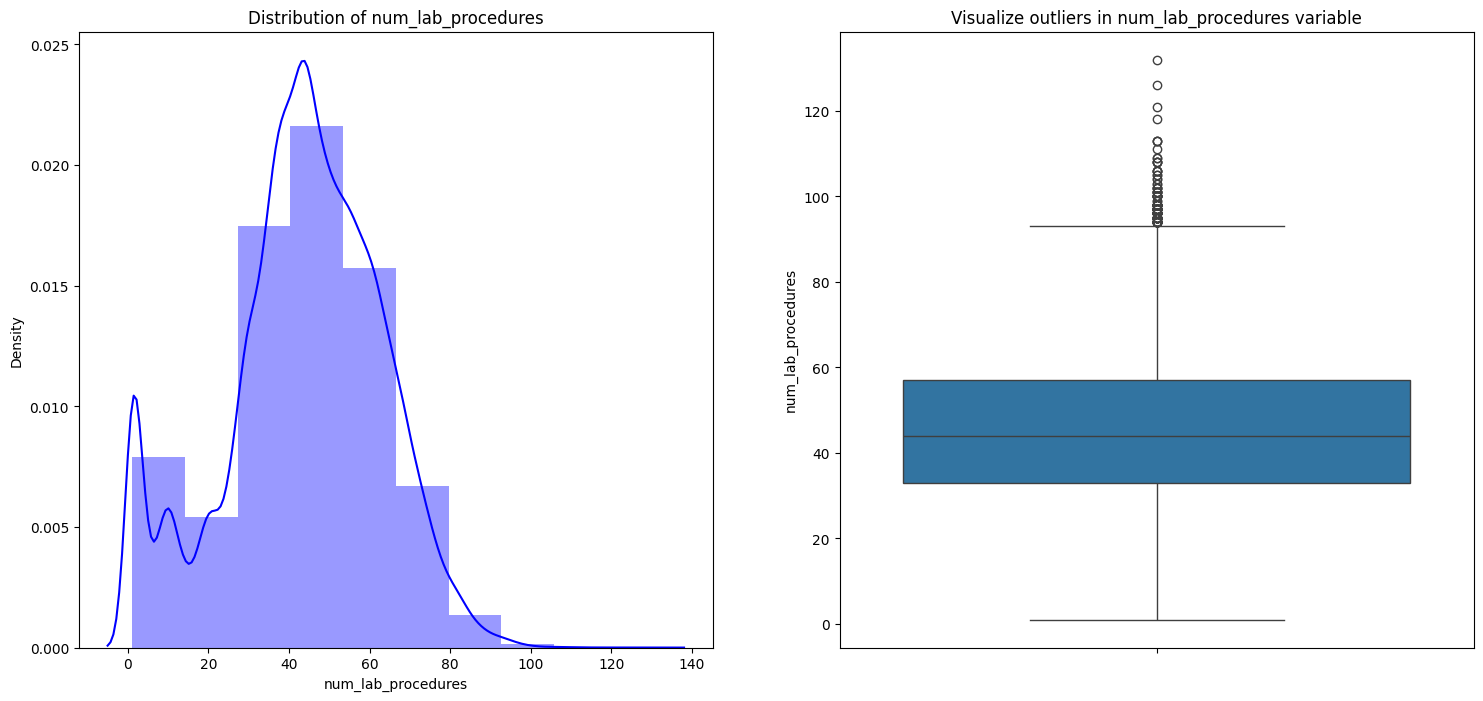

       num_procedures
count    81817.000000
mean         1.340247
std          1.707540
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000


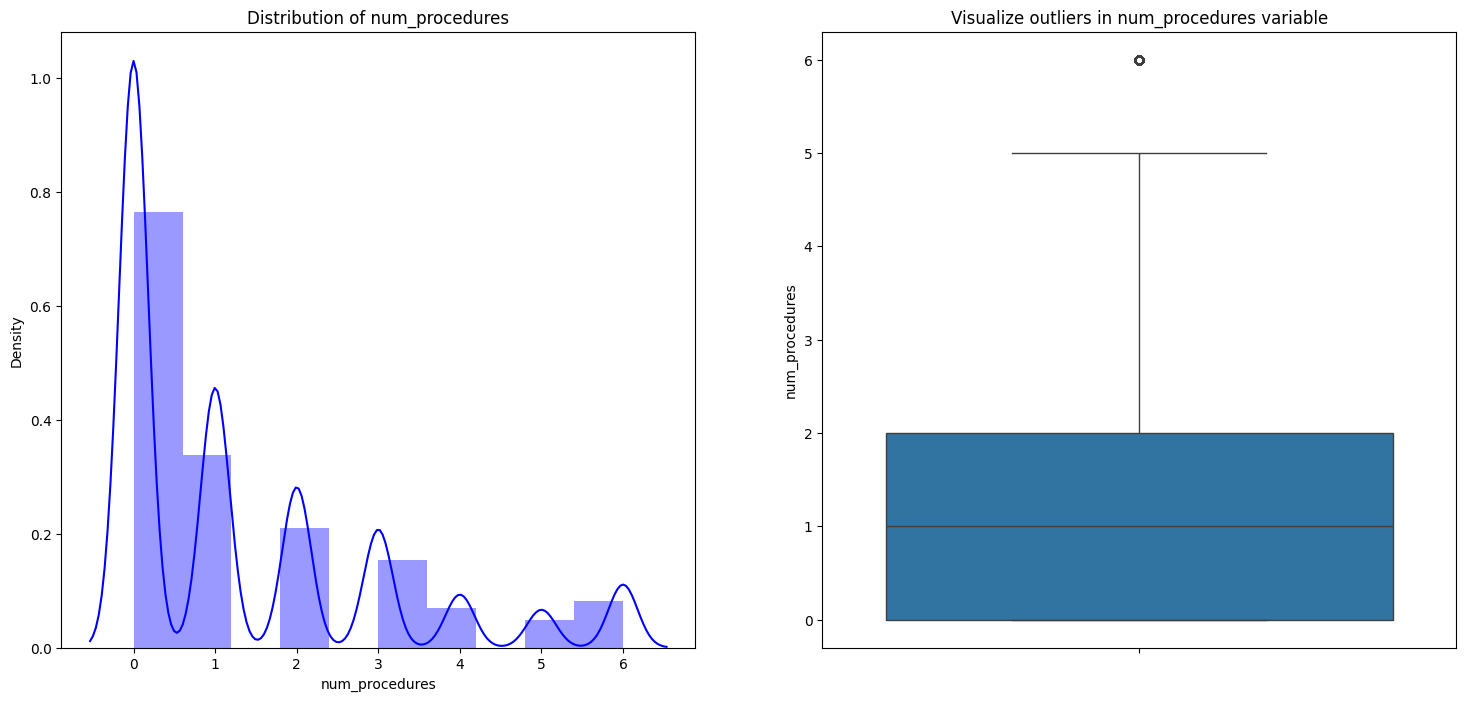

       num_medications
count     81817.000000
mean         16.048034
std           8.069173
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000


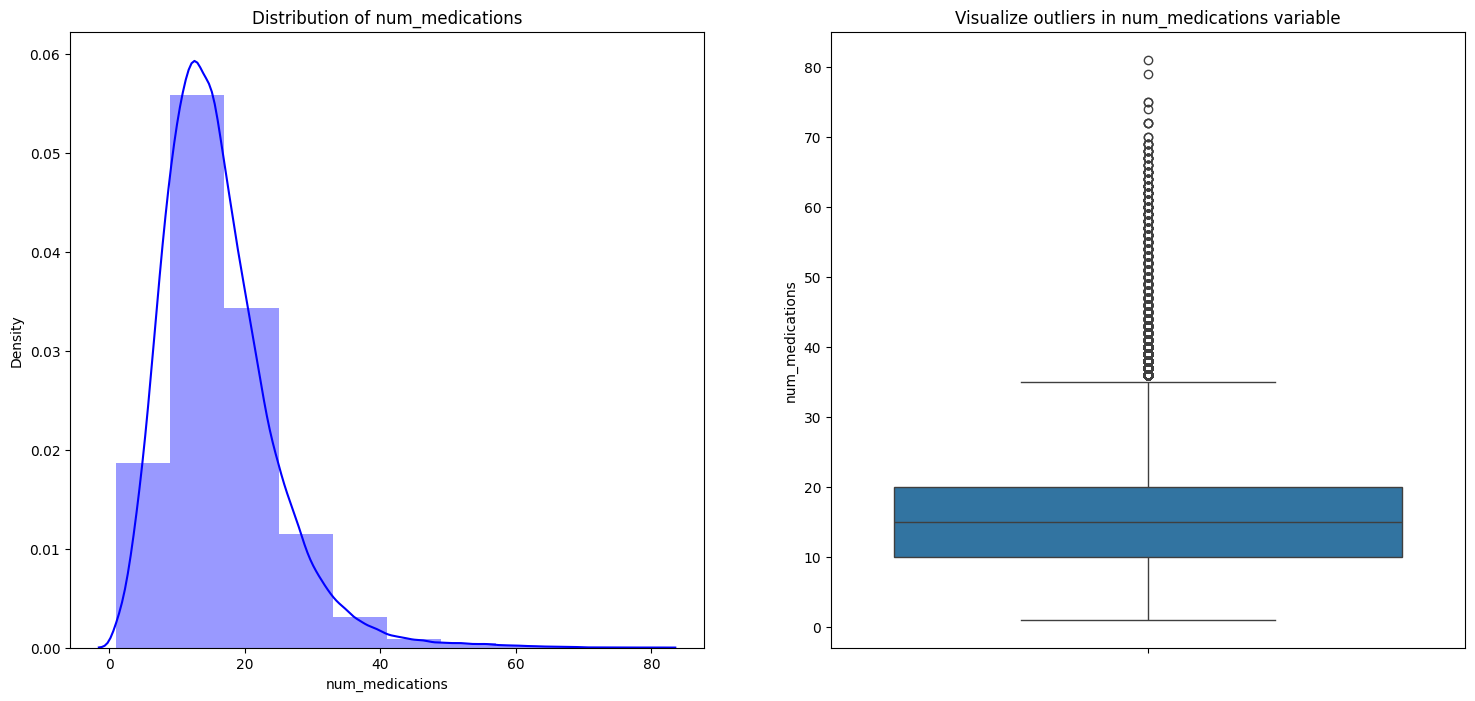

       number_outpatient
count       81817.000000
mean            0.360121
std             1.262395
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max            42.000000


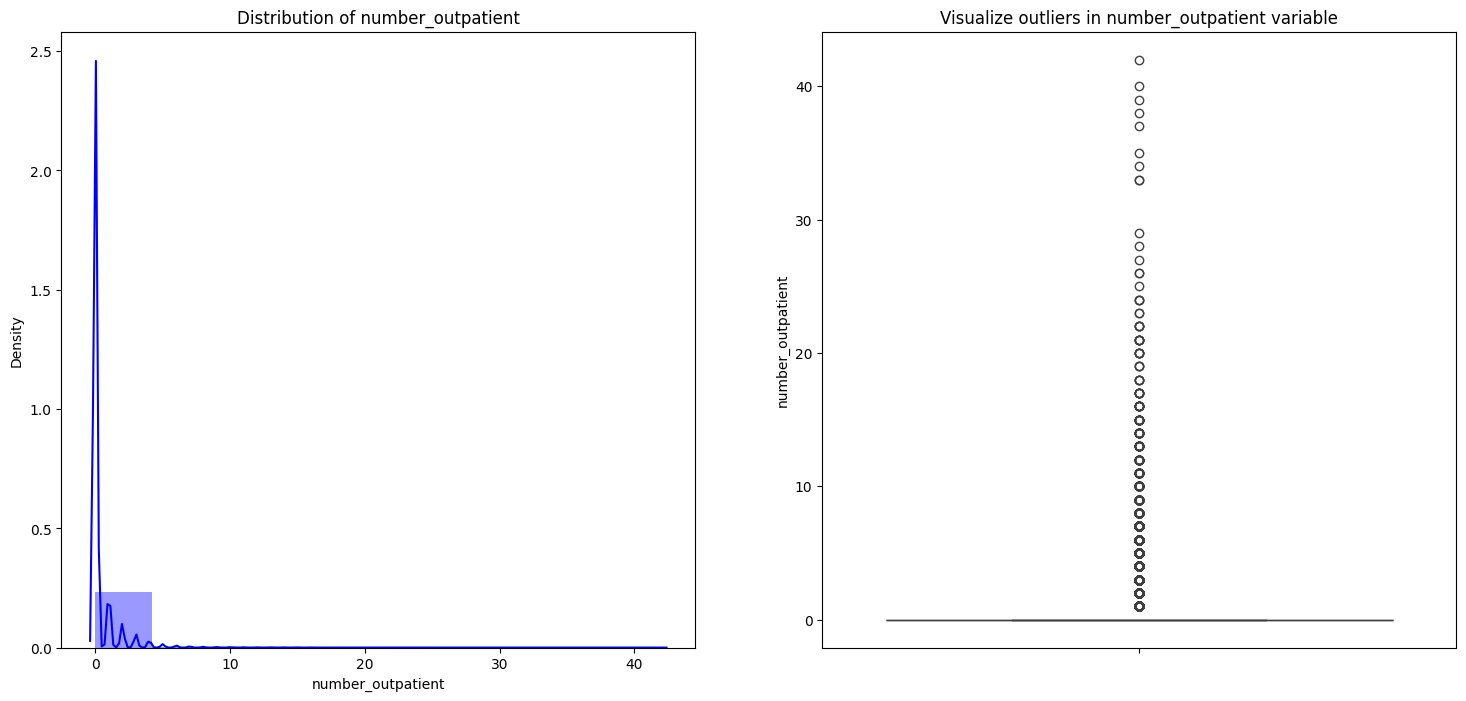

       number_emergency
count      81817.000000
mean           0.210616
std            0.990474
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           76.000000


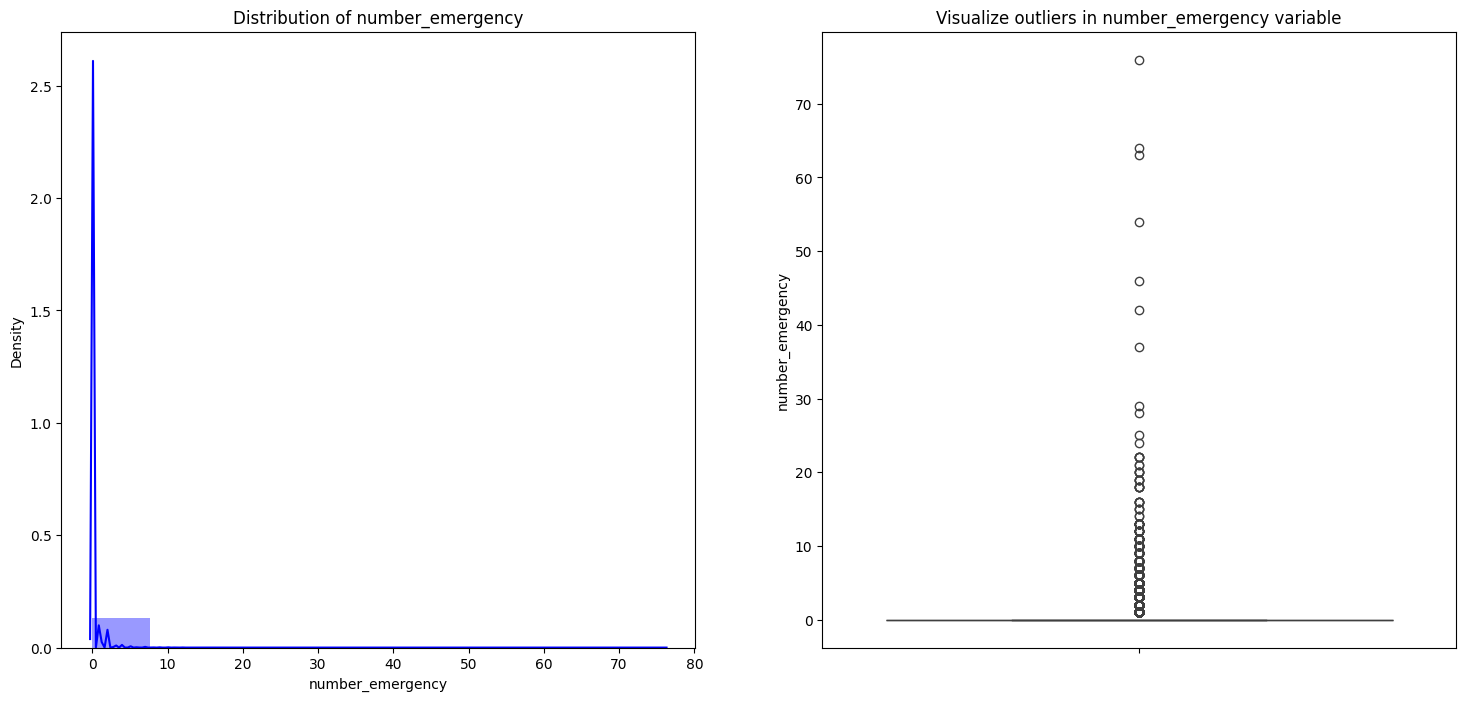

       number_inpatient
count      81817.000000
mean           0.652798
std            1.283760
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max           21.000000


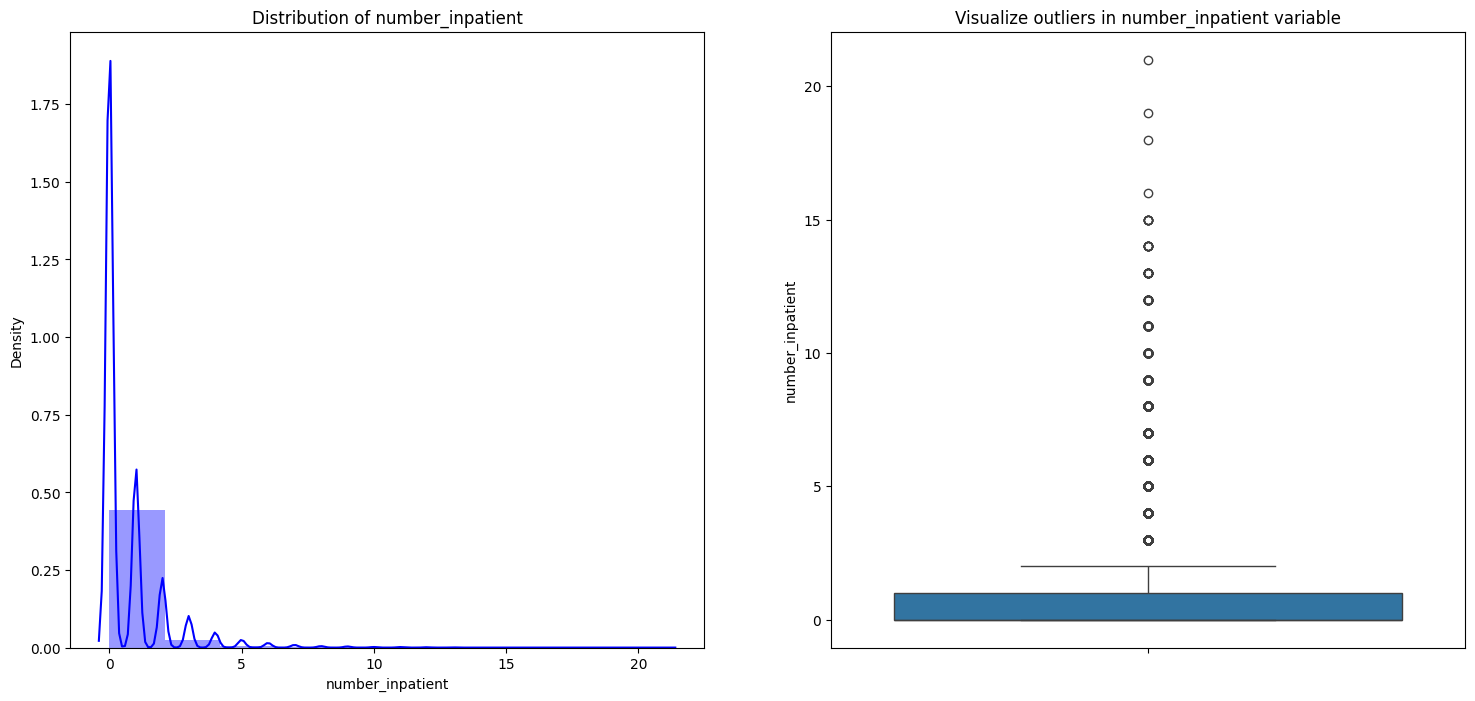

       number_diagnoses
count      81817.000000
mean           7.577838
std            1.822621
min            3.000000
25%            6.000000
50%            9.000000
75%            9.000000
max           16.000000


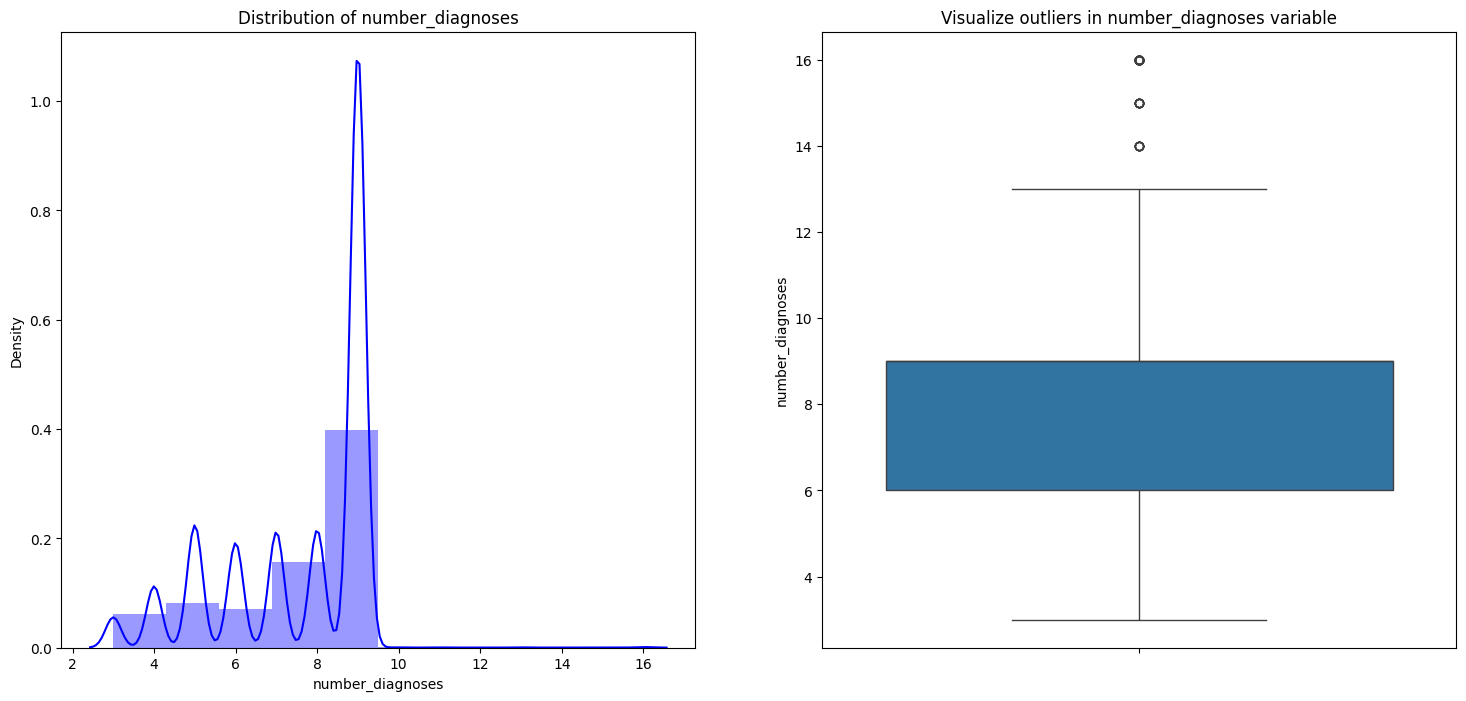

             change
count  81817.000000
mean       0.471528
std        0.499192
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


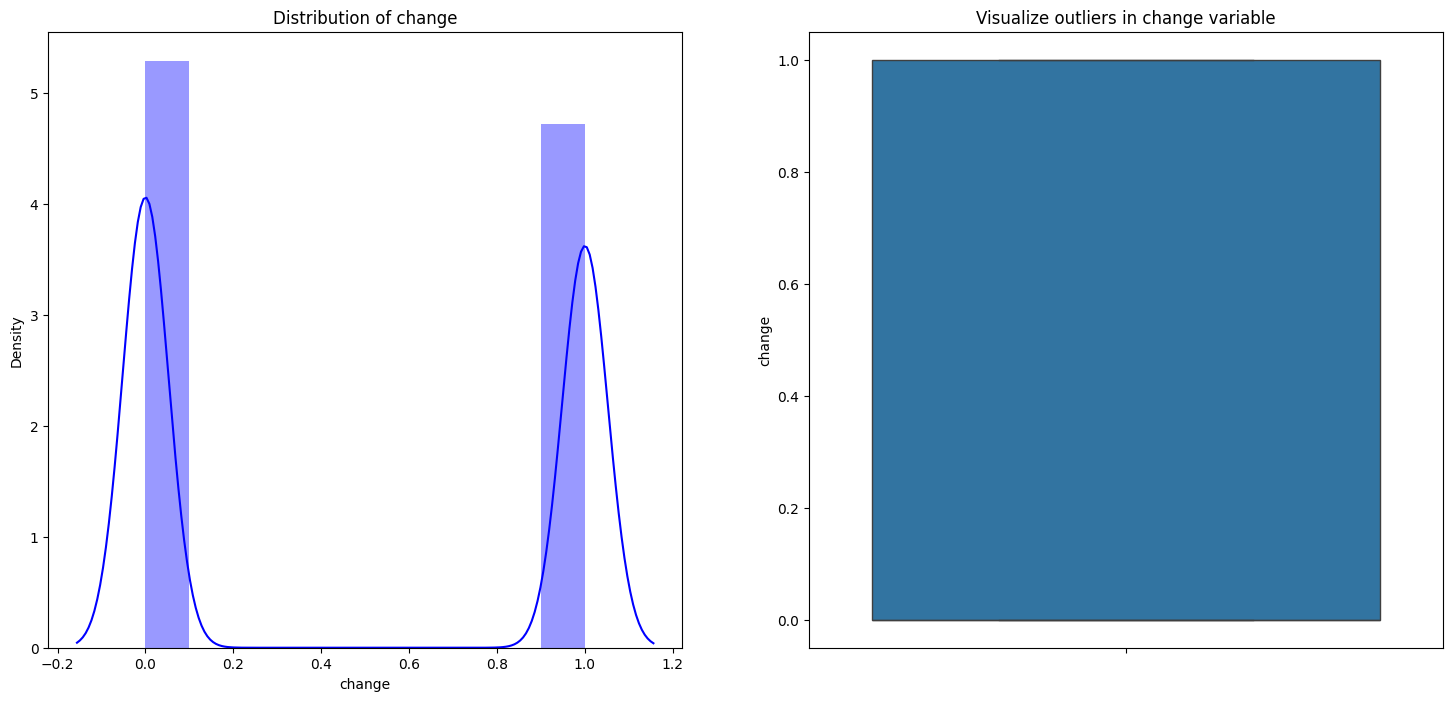

        diabetesMed
count  81817.000000
mean       0.776990
std        0.416267
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000


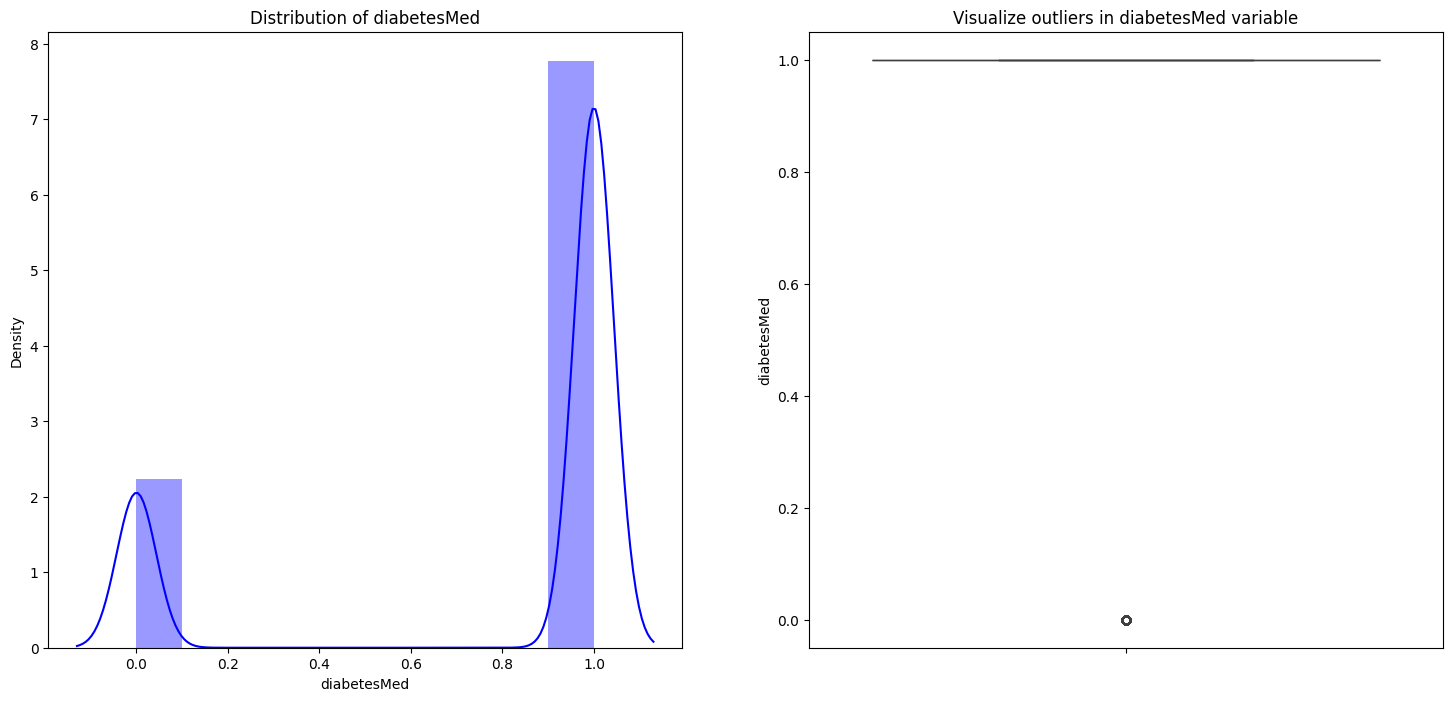

          glyburide
count  81817.000000
mean       0.099393
std        0.299190
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


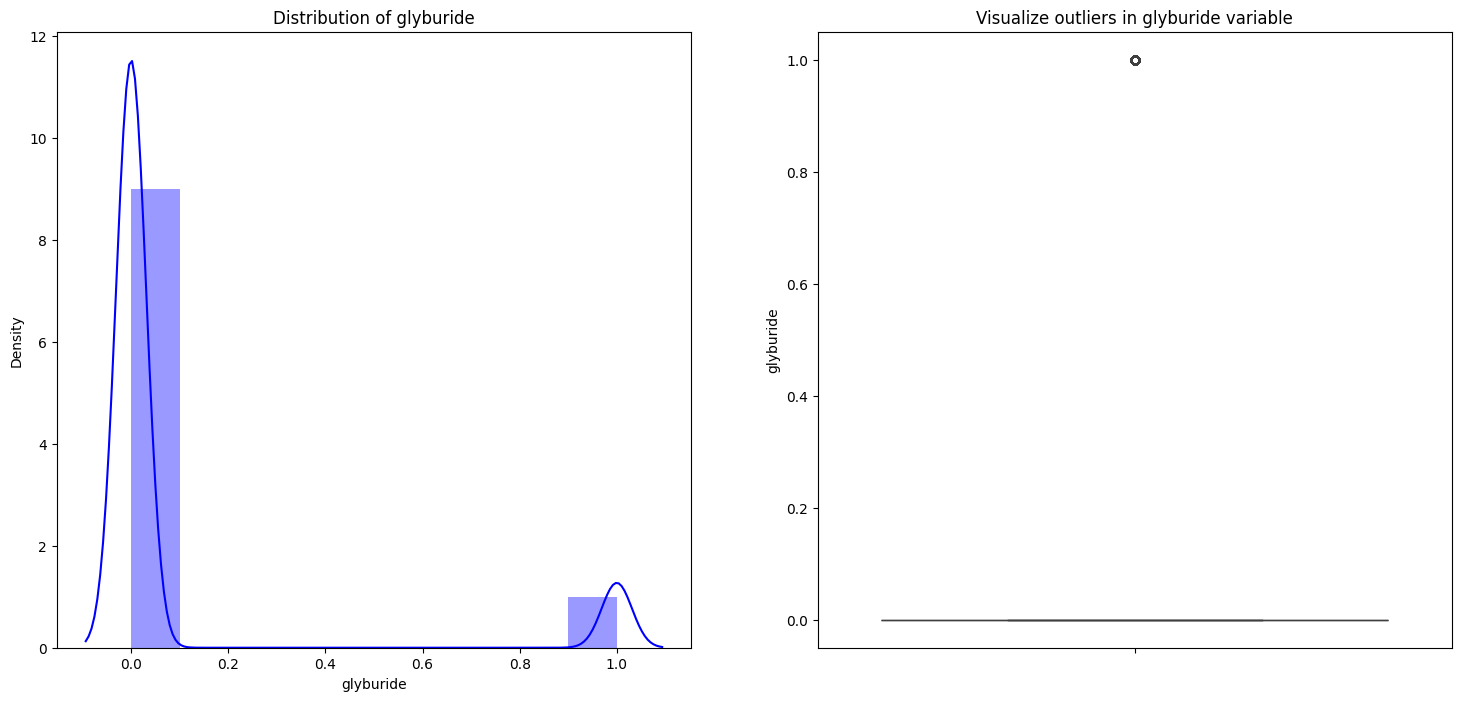

       glyburide-metformin
count         81817.000000
mean              0.007981
std               0.088981
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000


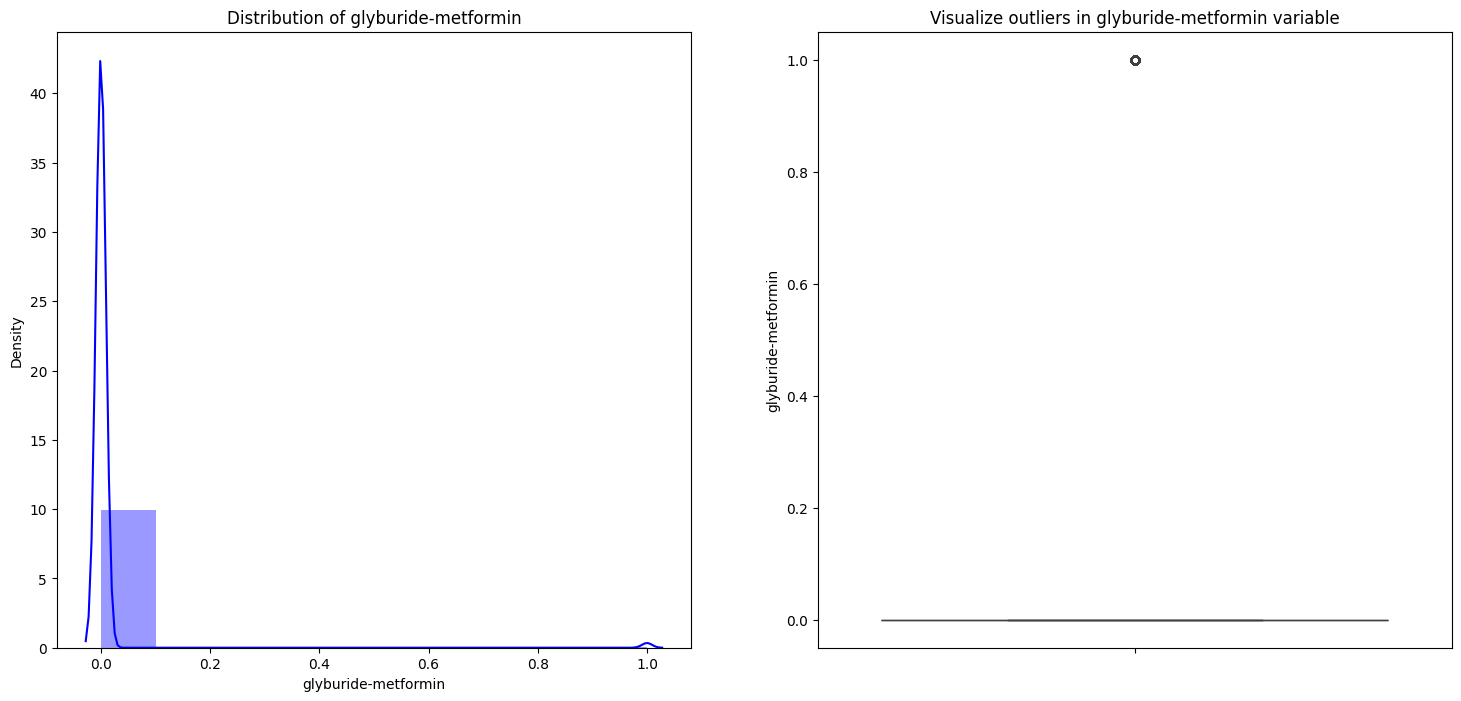

       troglitazone
count  81817.000000
mean       0.000024
std        0.004944
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


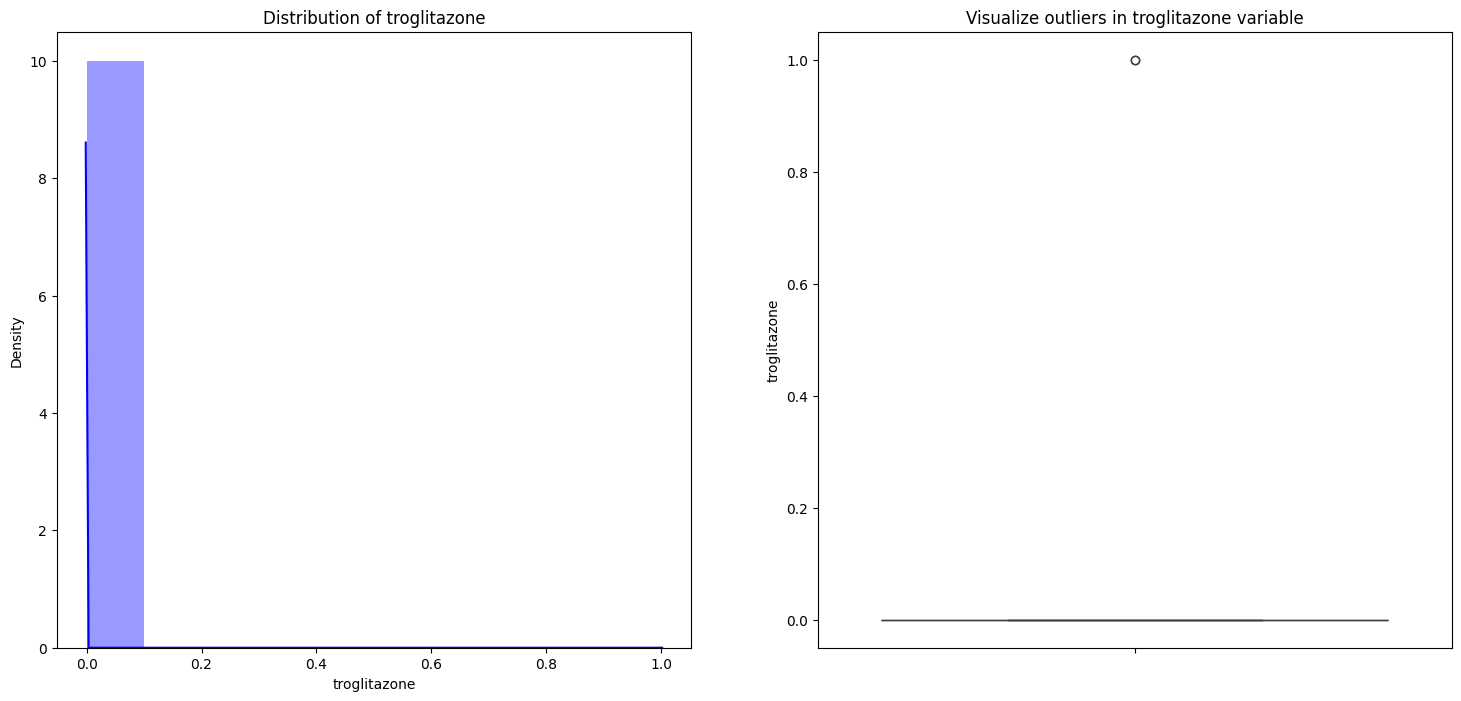

       metformin-pioglitazone
count            81817.000000
mean                 0.000012
std                  0.003496
min                  0.000000
25%                  0.000000
50%                  0.000000
75%                  0.000000
max                  1.000000


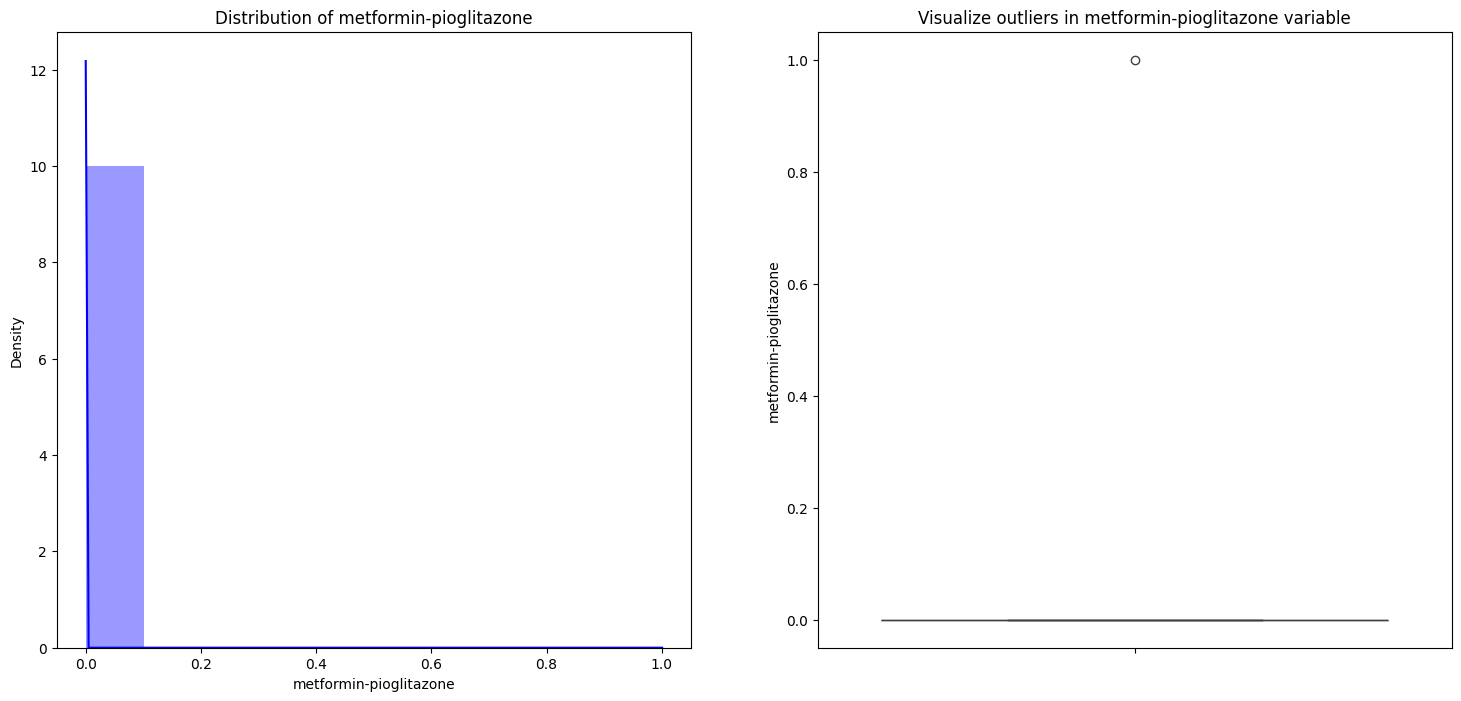

       metformin-rosiglitazone
count                  81817.0
mean                       0.0
std                        0.0
min                        0.0
25%                        0.0
50%                        0.0
75%                        0.0
max                        0.0


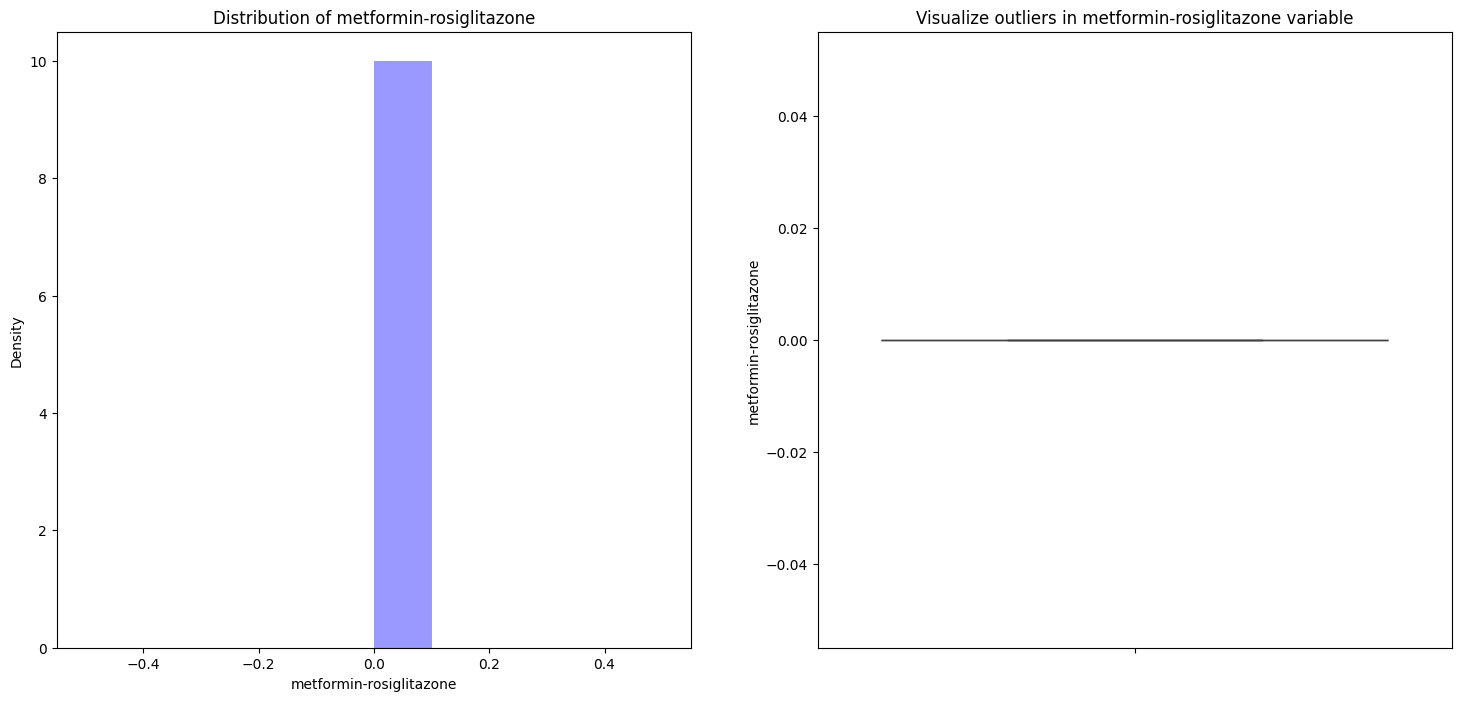

       rosiglitazone
count   81817.000000
mean        0.062933
std         0.242844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


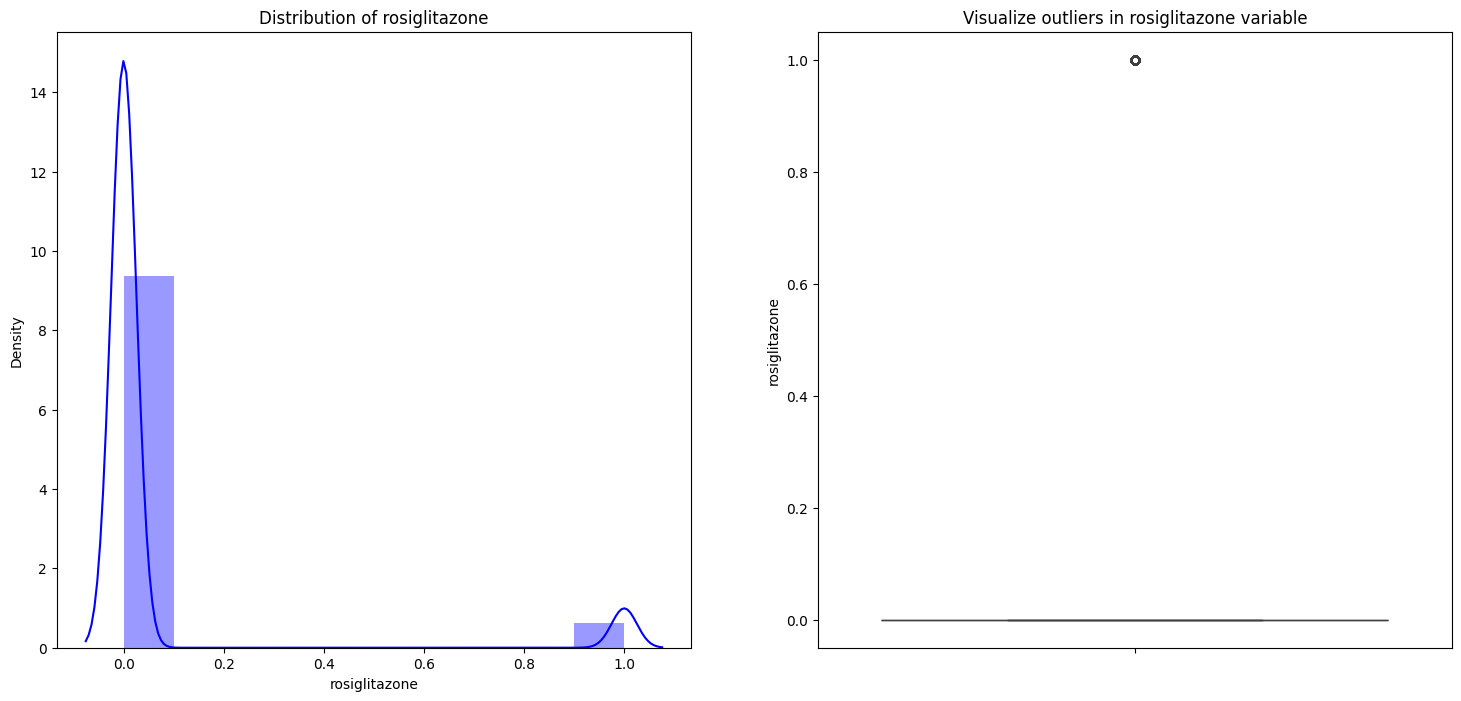

       chlorpropamide
count    81817.000000
mean         0.000599
std          0.024465
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000


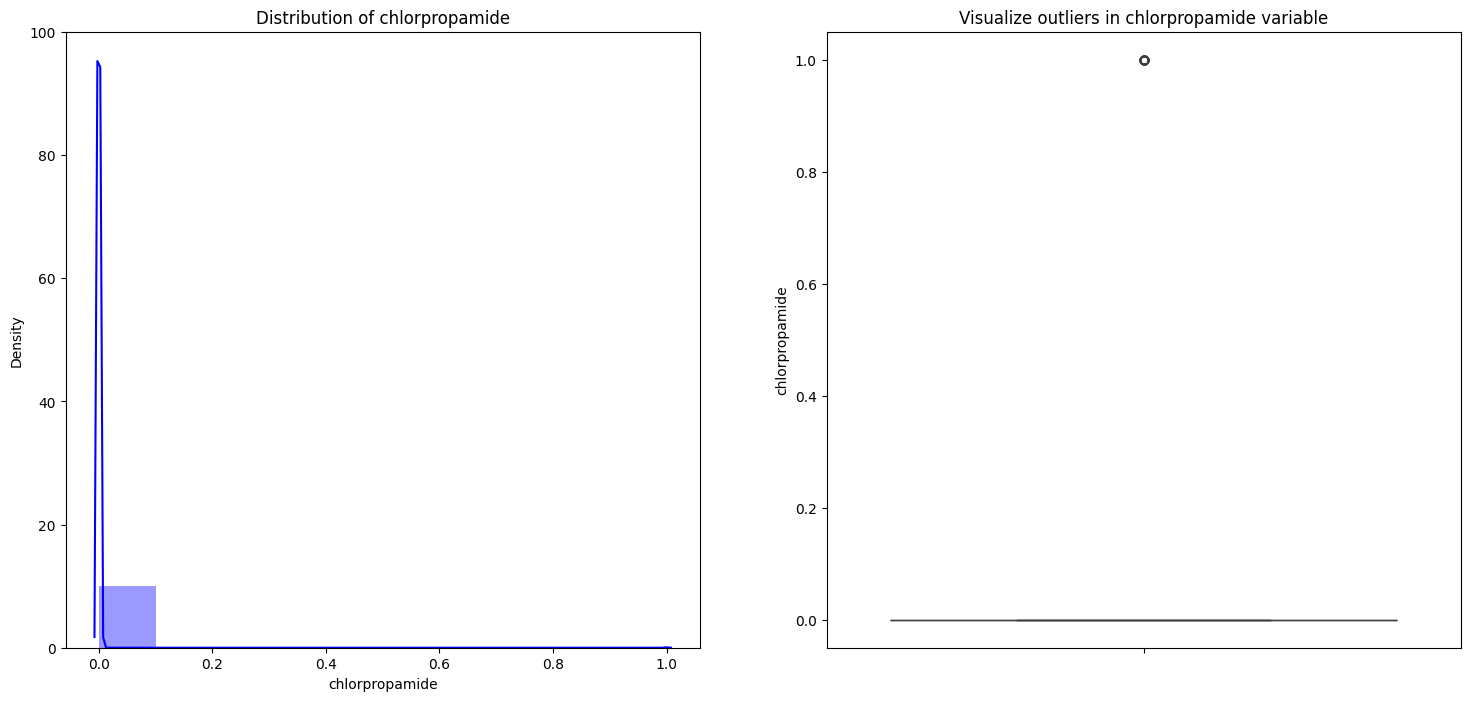

         tolazamide
count  81817.000000
mean       0.000232
std        0.015237
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


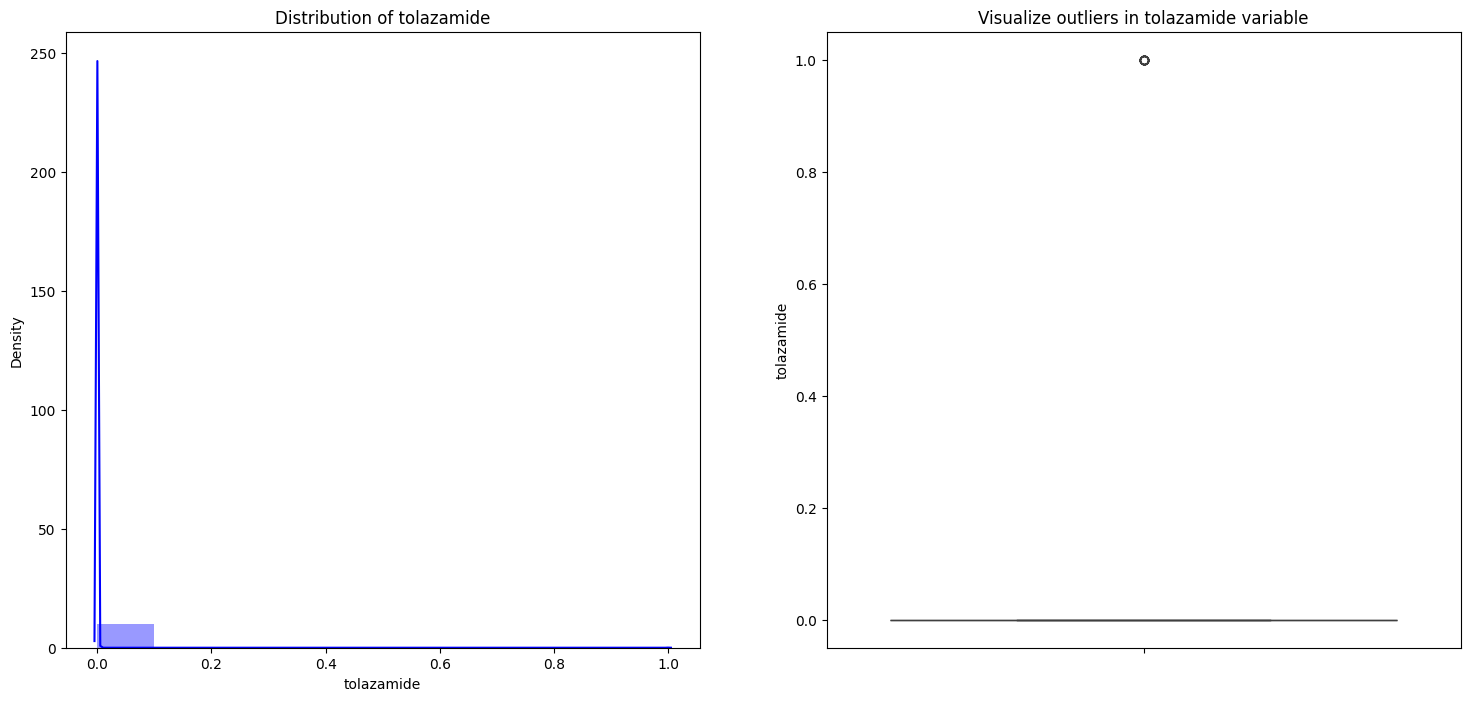

           miglitol
count  81817.000000
mean       0.000416
std        0.020381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


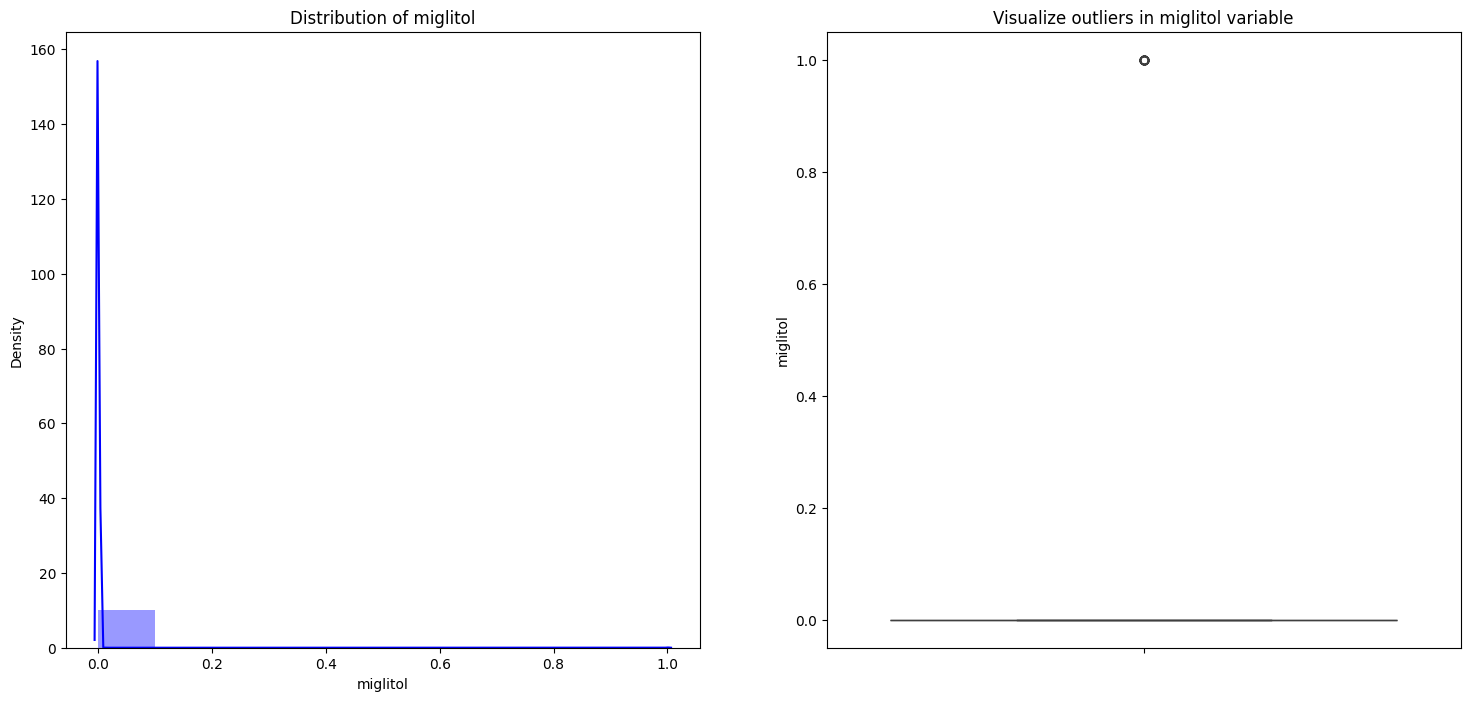

          glipizide
count  81817.000000
mean       0.127235
std        0.333238
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


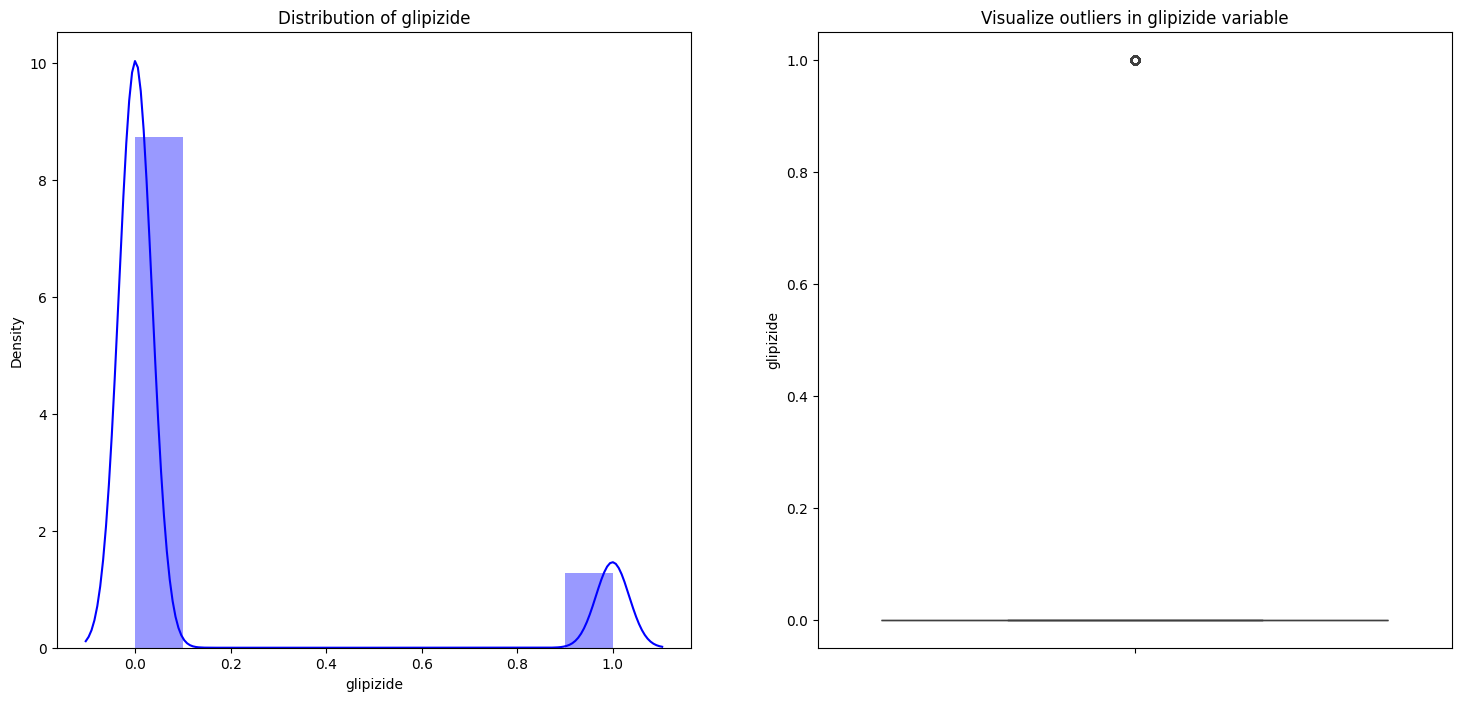

            insulin
count  81817.000000
mean       0.545852
std        0.497896
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


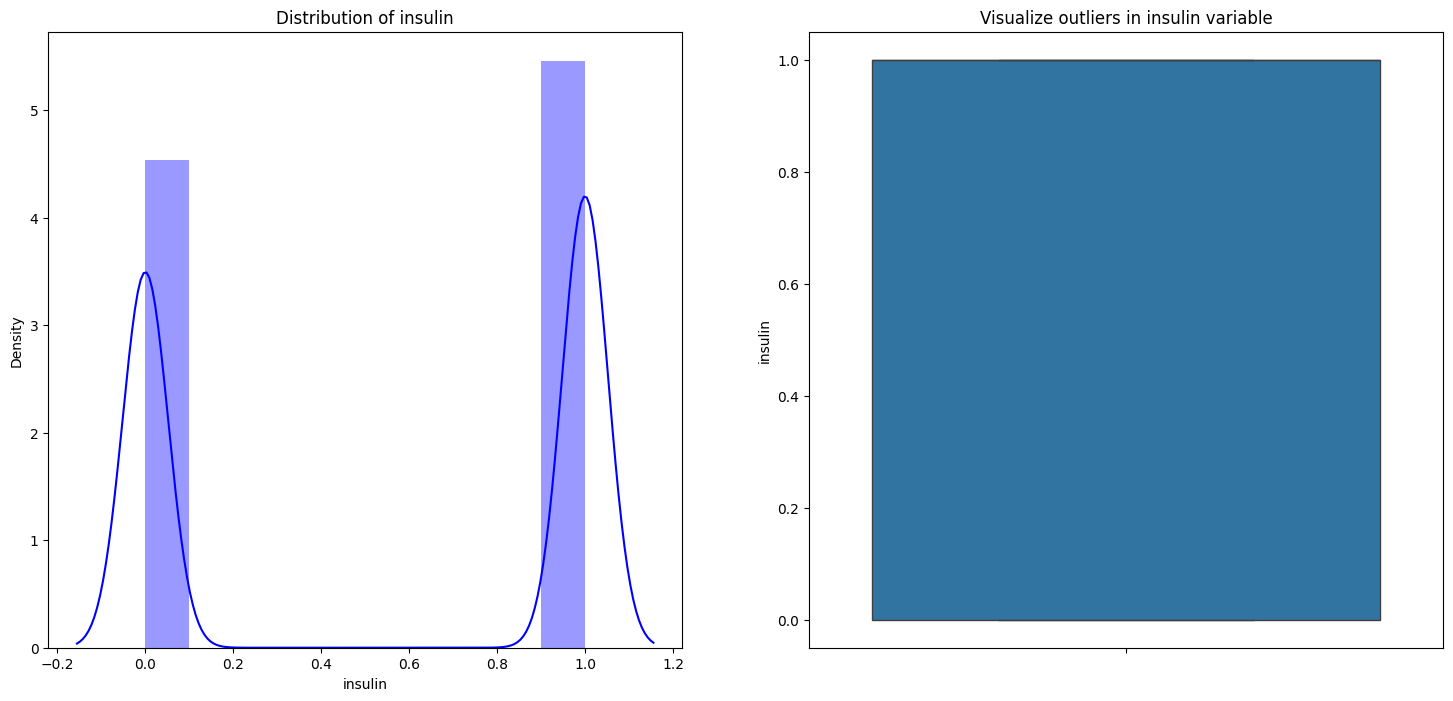

       glipizide-metformin
count         81817.000000
mean              0.000159
std               0.012604
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000


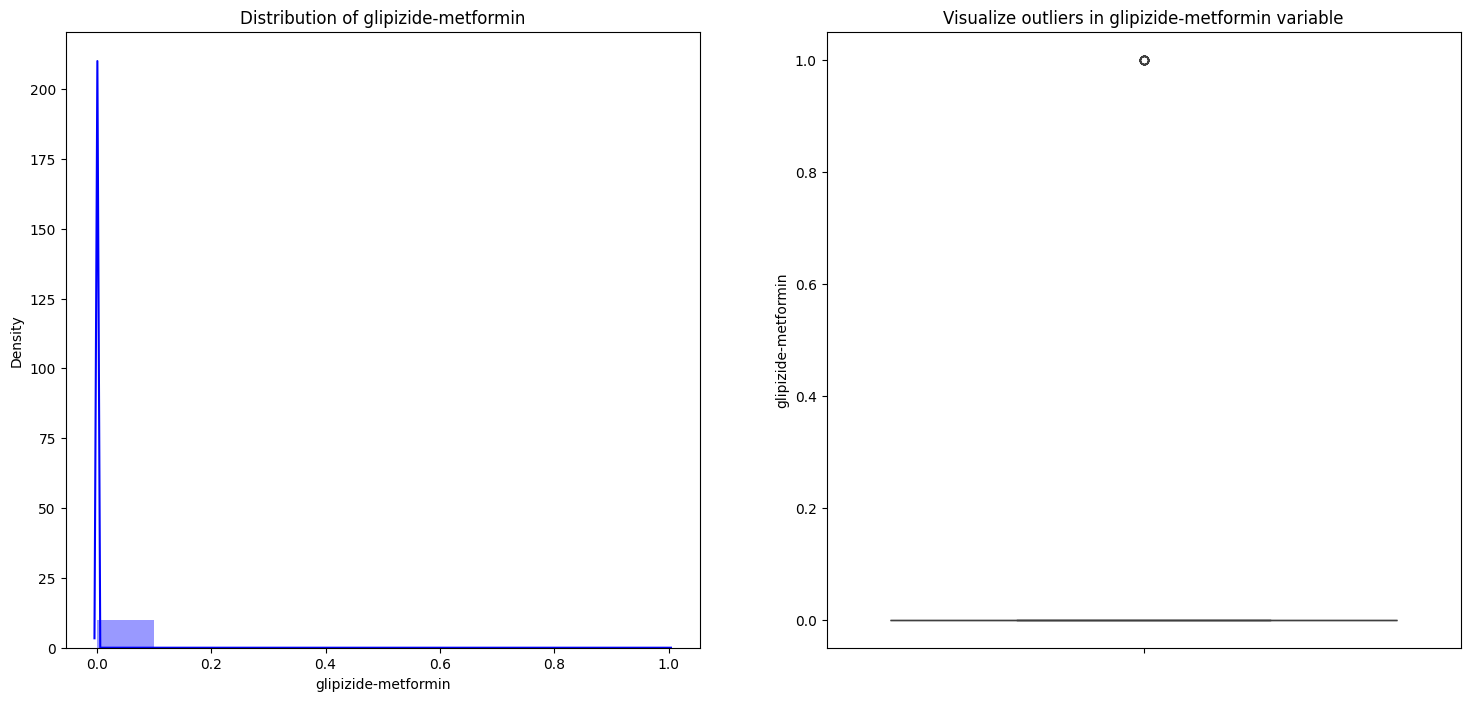

        glimepiride
count  81817.000000
mean       0.055416
std        0.228793
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


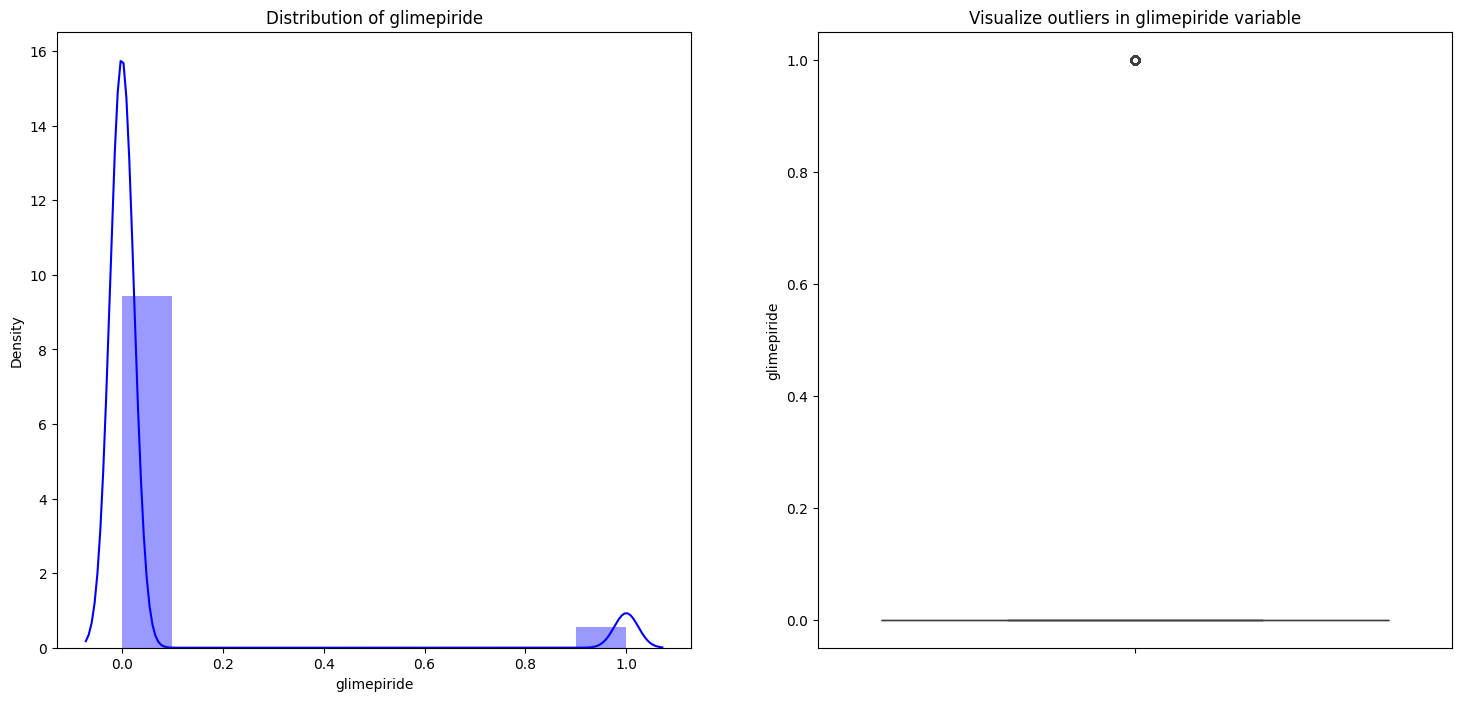

           acarbose
count  81817.000000
mean       0.002994
std        0.054640
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


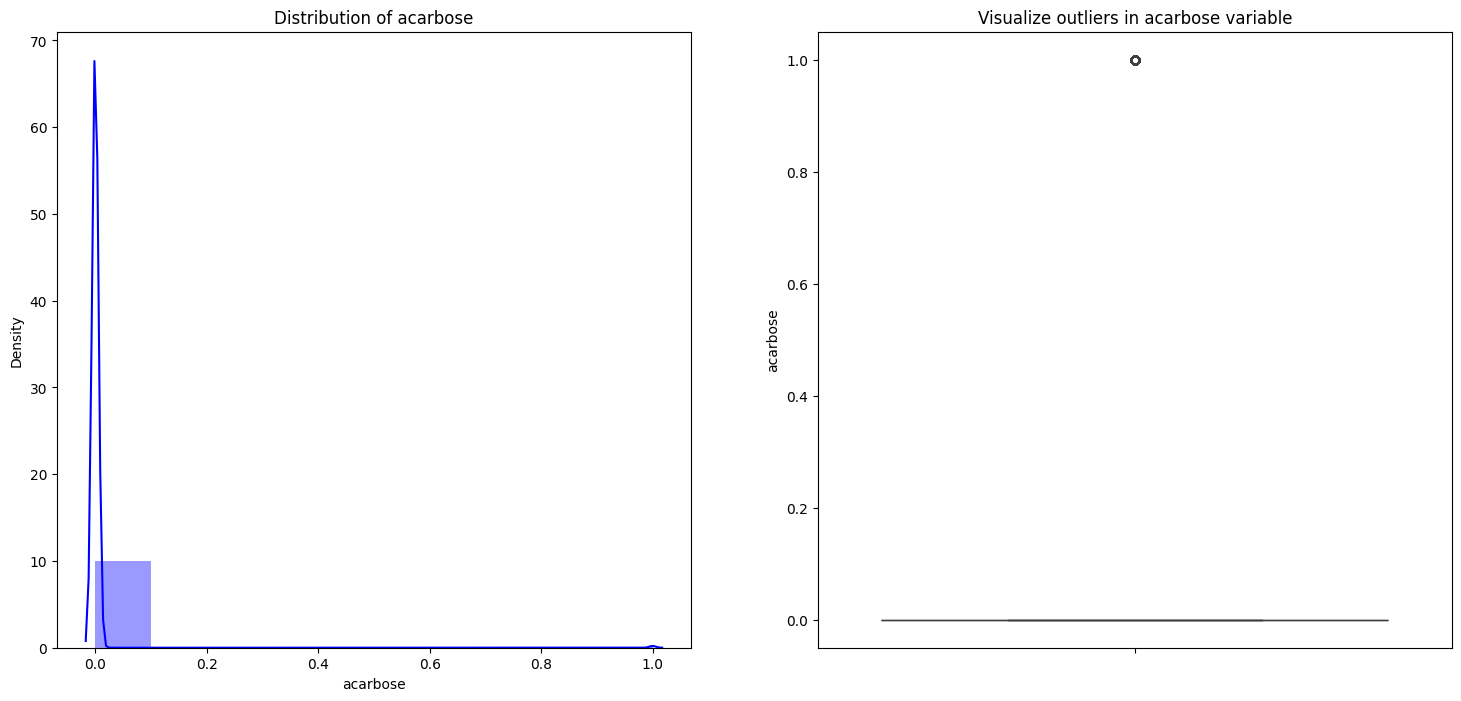

       acetohexamide
count   81817.000000
mean        0.000012
std         0.003496
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


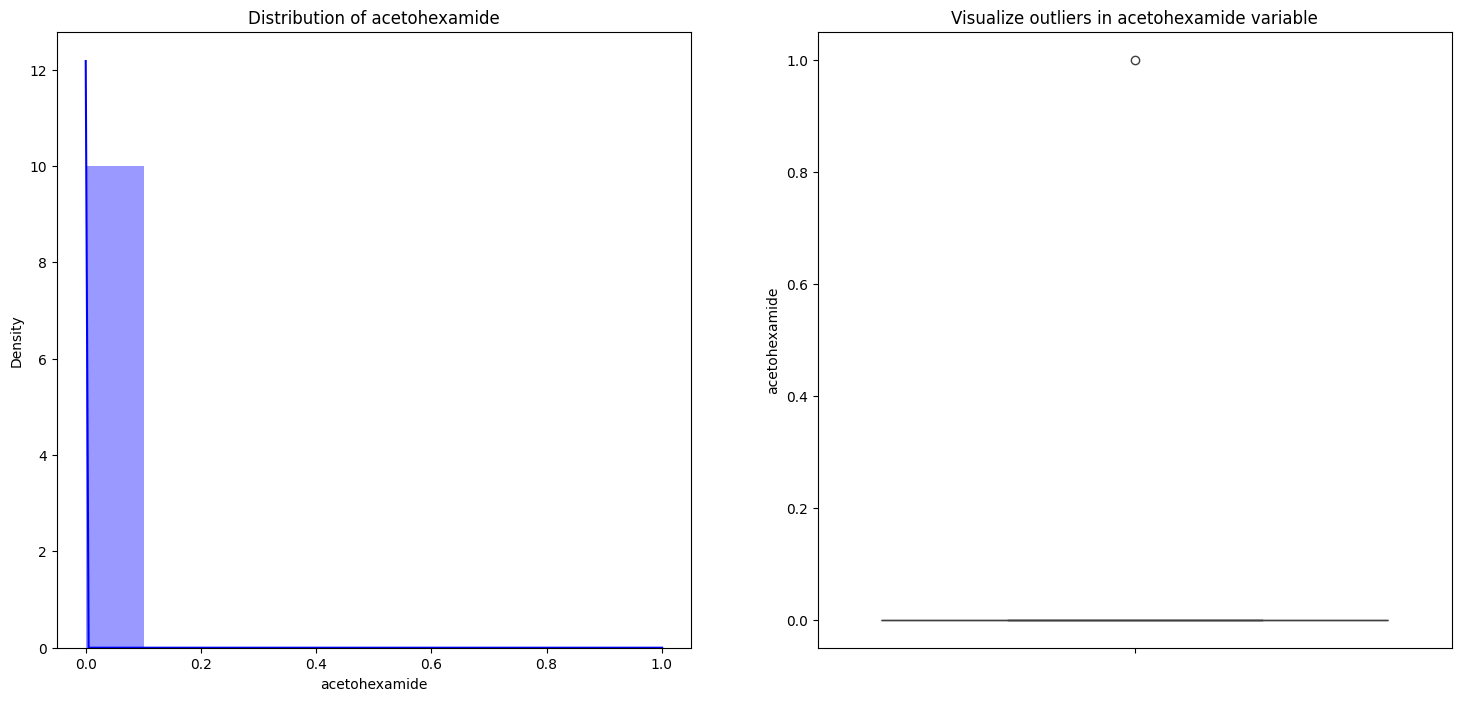

        repaglinide
count  81817.000000
mean       0.017405
std        0.130775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


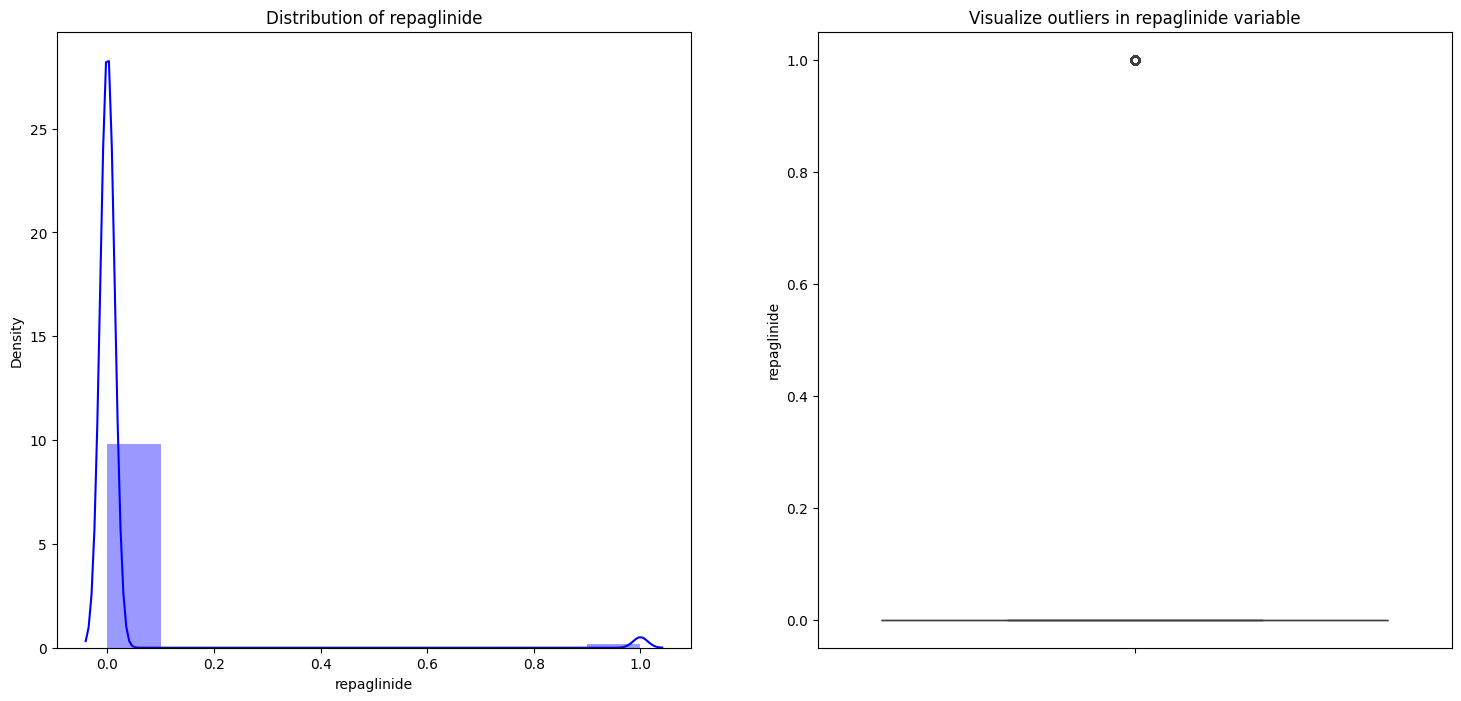

        nateglinide
count  81817.000000
mean       0.008042
std        0.089318
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


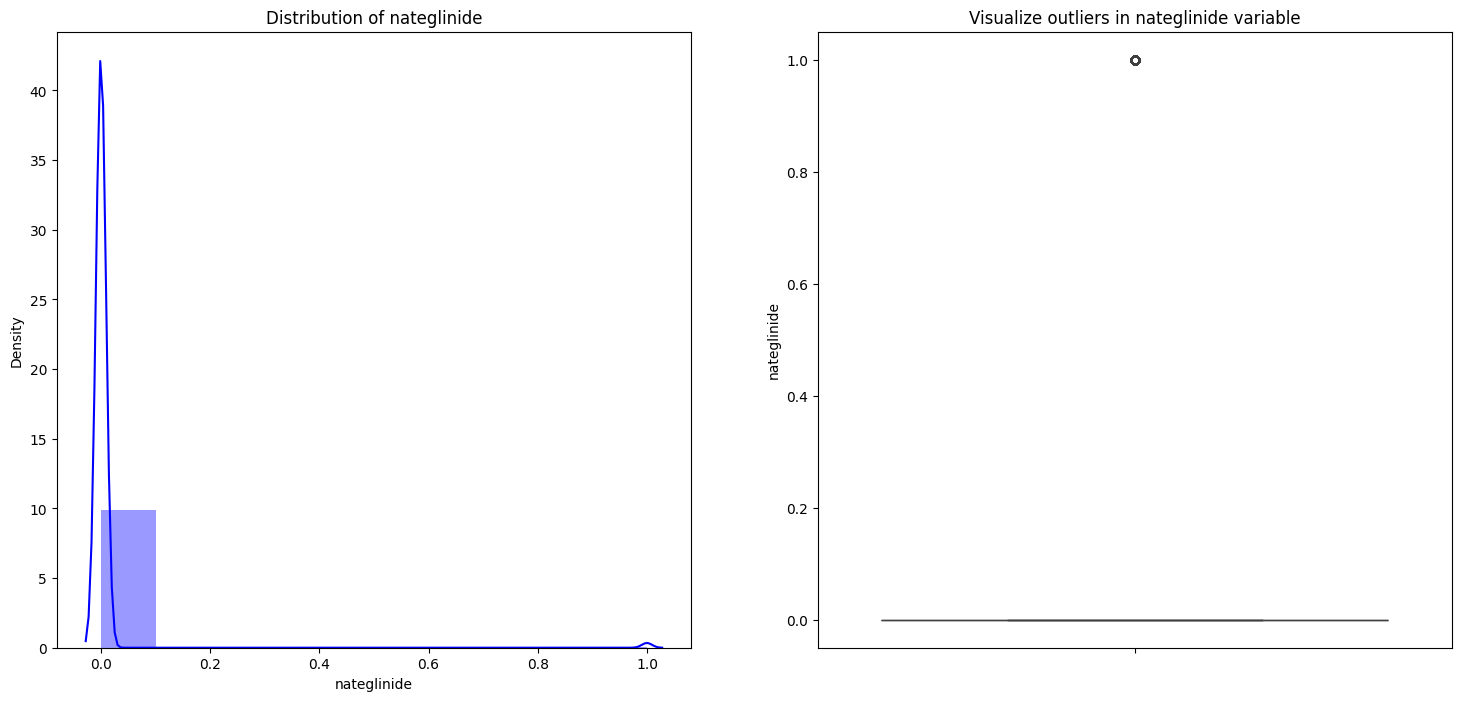

       glimepiride-pioglitazone
count              81817.000000
mean                   0.000012
std                    0.003496
min                    0.000000
25%                    0.000000
50%                    0.000000
75%                    0.000000
max                    1.000000


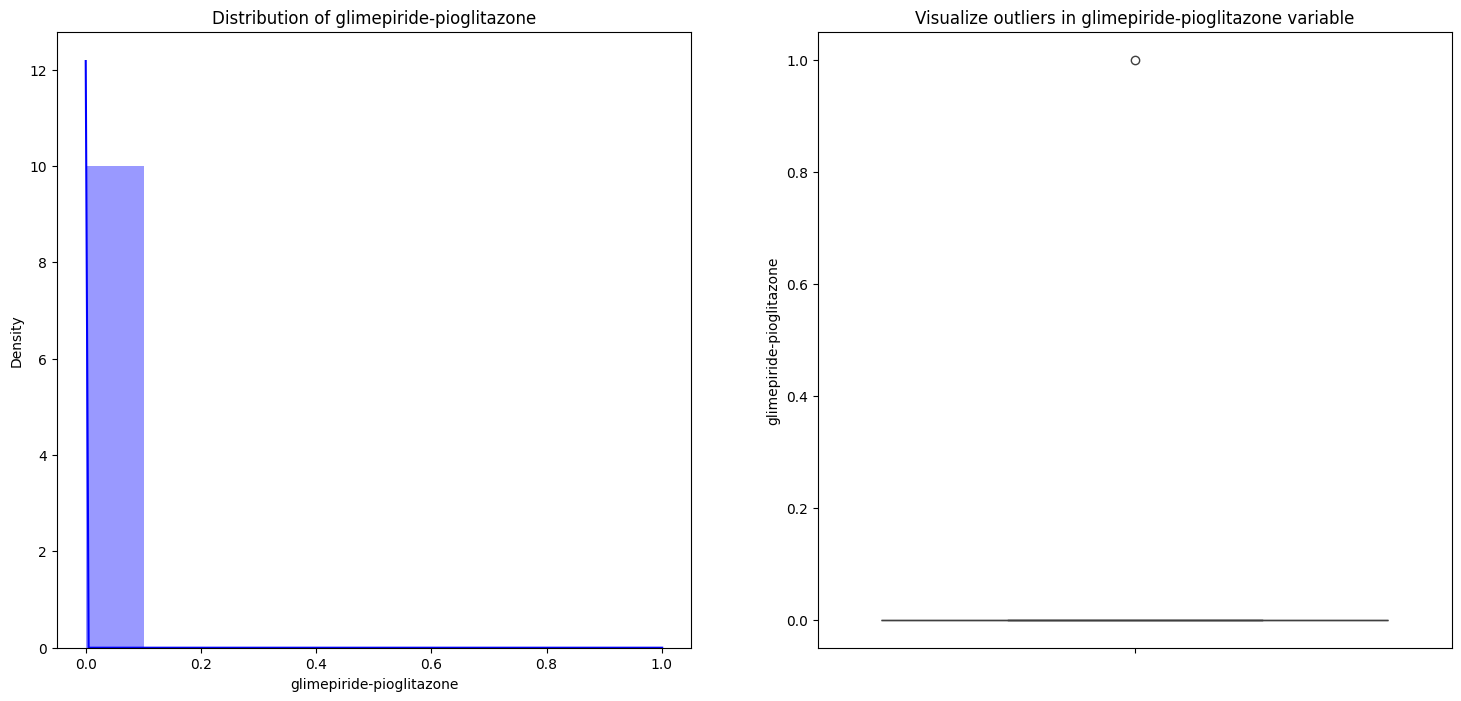

       pioglitazone
count  81817.000000
mean       0.074728
std        0.262953
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


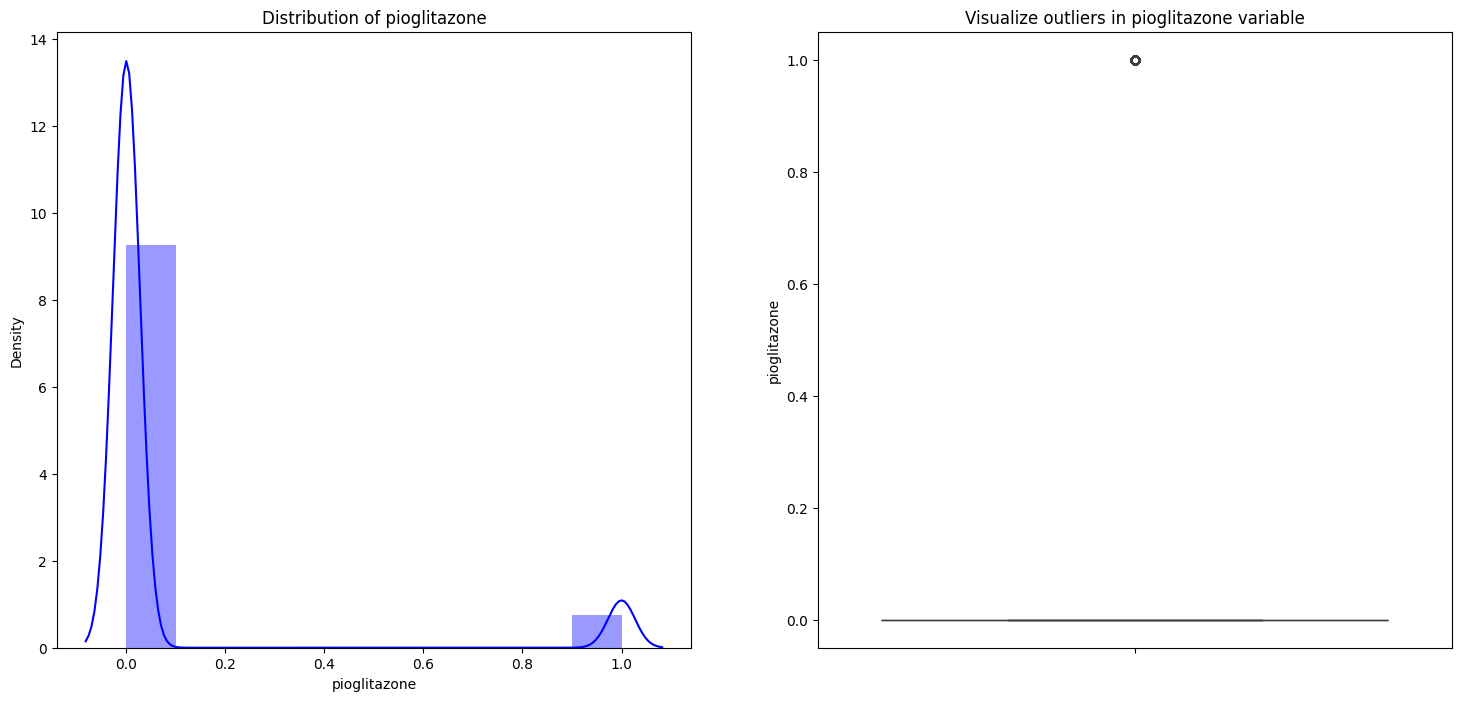

        tolbutamide
count  81817.000000
mean       0.000171
std        0.013080
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


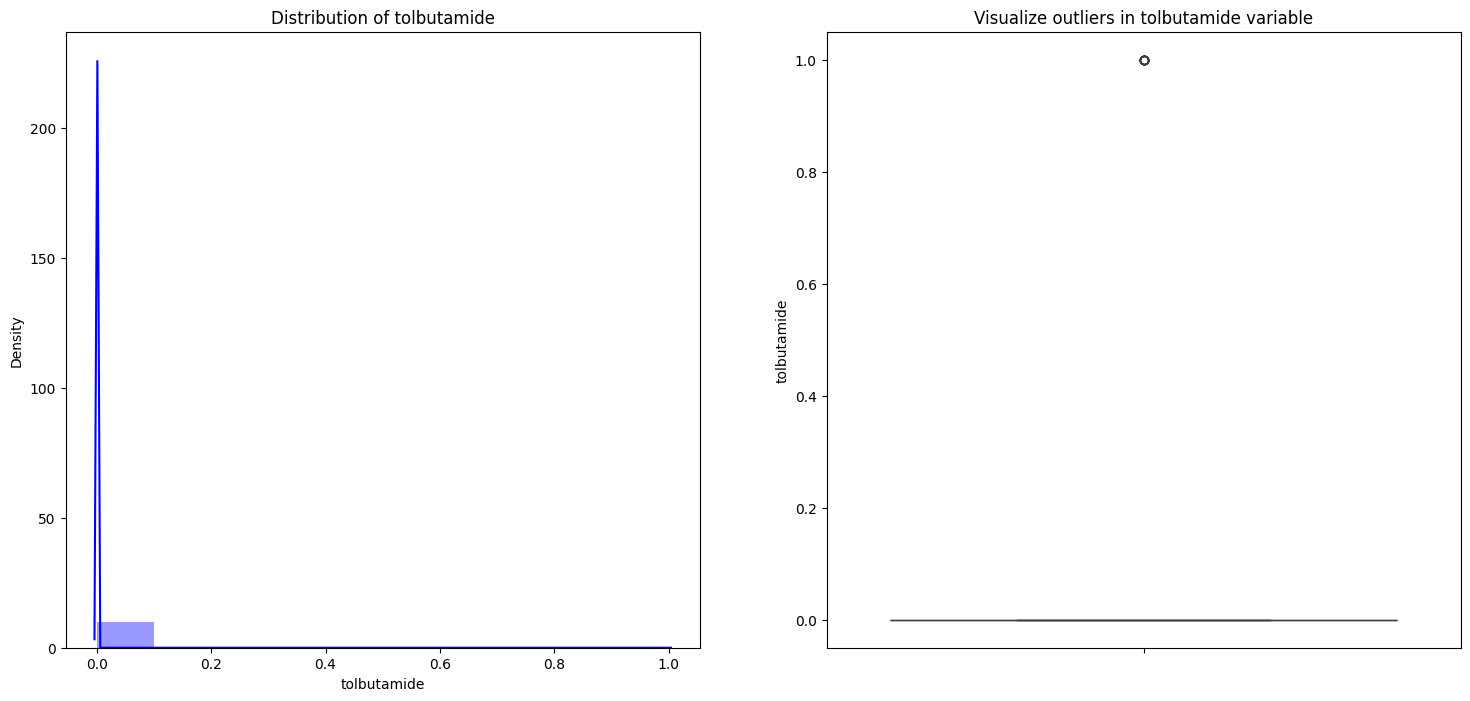

          metformin
count  81817.000000
mean       0.200203
std        0.400155
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


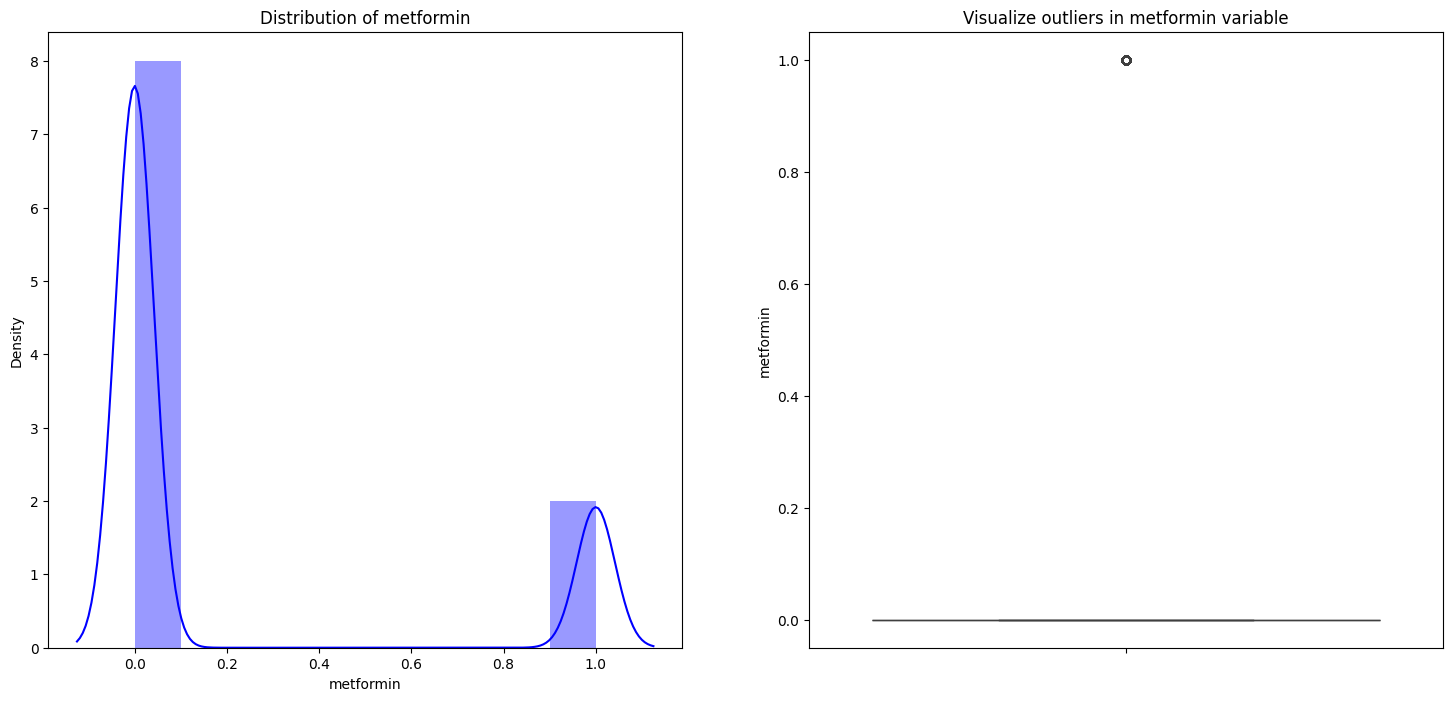

         readmitted
count  81817.000000
mean       0.114854
std        0.318847
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


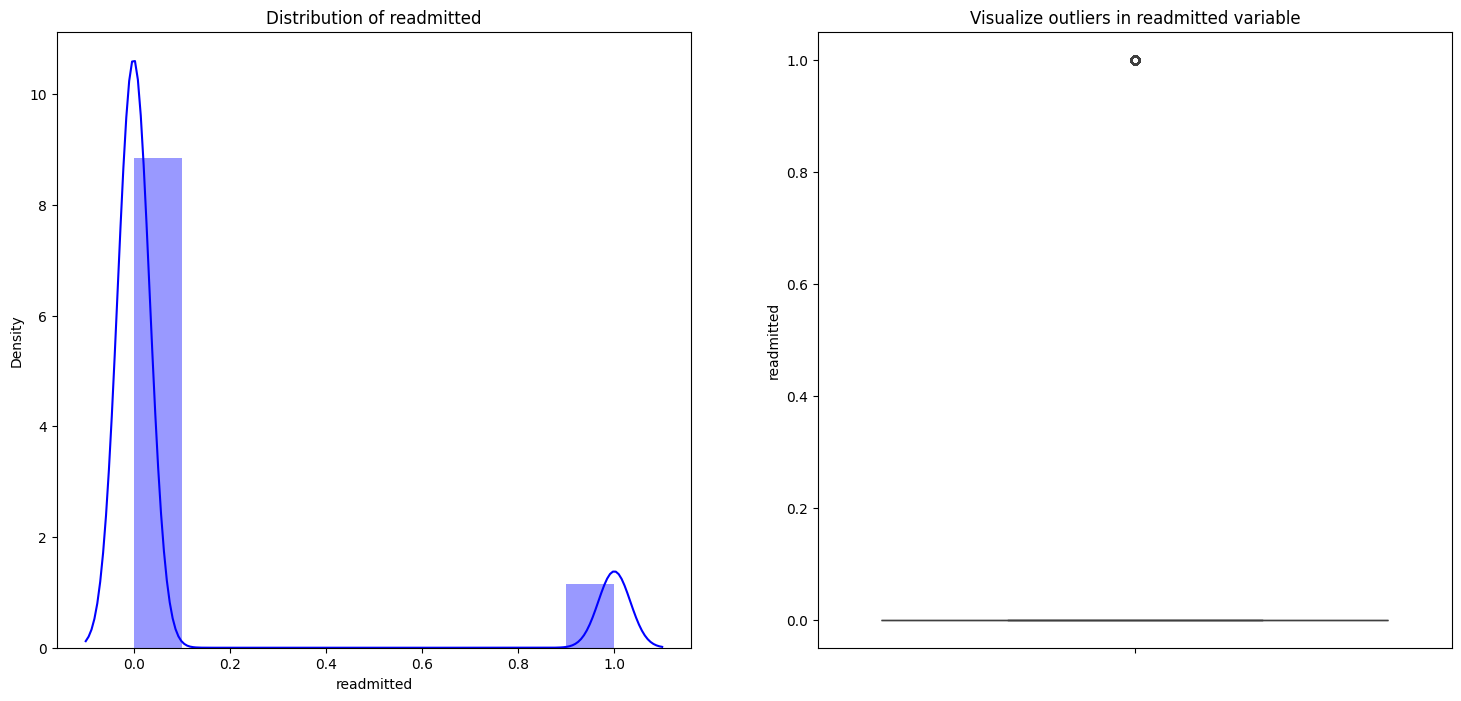

          diagnoses
count  81817.000000
mean       2.941956
std        0.238179
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        3.000000


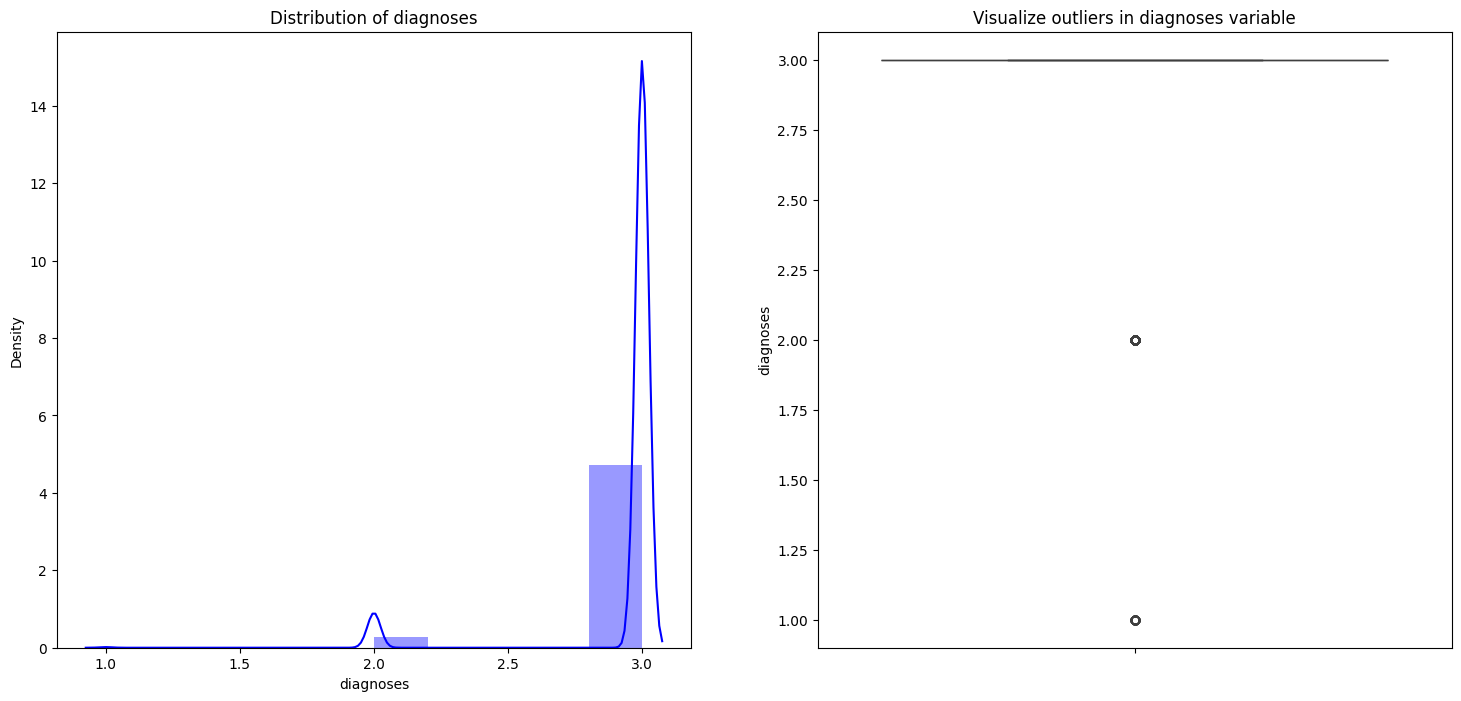

In [23]:
numerical = [var for var in df_diabetes.columns if df_diabetes[var].dtype!='O']

for i in numerical:
    print(pd.DataFrame(df_diabetes[i].describe()))
    f, ax = plt.subplots(1, 2, figsize=(18,8))

    ax[0] = sns.distplot(df_diabetes[i], bins=10, color='blue',ax=ax[0])
    ax[0].set_title(f"Distribution of {i}")

    ax[1] = sns.boxplot(df_diabetes[i])
    ax[1].set_title(f'Visualize outliers in {i} variable')

    plt.show()

In [29]:
Data_int = df_diabetes['number_outpatient']
print(Data_int.shape)
Q1 = Data_int.quantile(0.25)
Q3 = Data_int.quantile(0.75)
IQR = Q3 - Q1
df_outliers = Data_int.mask((Data_int < (Q1 - 1.5 * IQR)) | (Data_int > (Q3 + 1.5 * IQR))).dropna()
df_outliers.shape

(81817,)


(68767,)

# Modelos Predictivos

### Catboost

In [23]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import time

In [24]:
df_diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'change', 'diabetesMed', 'glyburide', 'glyburide-metformin',
       'troglitazone', 'metformin-pioglitazone', 'metformin-rosiglitazone',
       'rosiglitazone', 'chlorpropamide', 'tolazamide', 'miglitol',
       'glipizide', 'insulin', 'glipizide-metformin', 'glimepiride',
       'acarbose', 'acetohexamide', 'repaglinide', 'nateglinide',
       'glimepiride-pioglitazone', 'pioglitazone', 'tolbutamide', 'metformin',
       'readmitted', 'categories_diag_1', 'categories_diag_2',
       'categories_diag_3', 'distinctDiagnoses', 'numberOfMedications'],
      dtype='object')

In [41]:
features = ['race', 'gender', 'age','admission_type_id', 'discharge_disposition_id', 
            'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
            'num_medications', 'number_outpatient', 'number_emergency',
            'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed', 'glyburide',
            'glyburide-metformin', 'rosiglitazone',
            'glipizide', 'insulin', 'glimepiride',
            'acarbose', 'repaglinide', 'nateglinide', 
            'pioglitazone', 'metformin',
            'categories_diag_1', 'categories_diag_2', 'categories_diag_3']

#out_features = ['readmitted', diag_1', 'diag_2', 'diag_3', 'encounter_id', 'patient_nbr']
#out_firts_try = ['troglitazone', 'tolazamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'acetohexamide', 'glimepiride-pioglitazone',]
# ['tolbutamide', 'miglitol', 'glipizide-metformin' 'chlorpropamide', ]
df_result = df_diabetes.copy()

X = df_result.loc[:, features]
y = df_result['readmitted']

cat_features = X.select_dtypes('object').columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)


weight_0 = 1
weight_1 = 72420/9397

In [42]:
clf_cat = CatBoostClassifier(subsample=0.8,
                             n_estimators=150,
                             max_depth=7,
                             l2_leaf_reg=5,
                             learning_rate=0.1,
                             class_weights=[weight_0, weight_1],)

clf_cat.fit(X_train, y_train,
            cat_features=cat_features,
            eval_set=(X_test, y_test),
            verbose=False)

print(clf_cat.get_best_score())

{'learn': {'Logloss': 0.6109268937147301}, 'validation': {'Logloss': 0.6451123797140499}}


In [43]:
predicted_y = clf_cat.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
print(metrics.classification_report(y_test, predicted_y))

Accuracy test: 66.62%
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     21752
           1       0.18      0.57      0.28      2794

    accuracy                           0.67     24546
   macro avg       0.55      0.62      0.53     24546
weighted avg       0.84      0.67      0.73     24546



<Axes: >

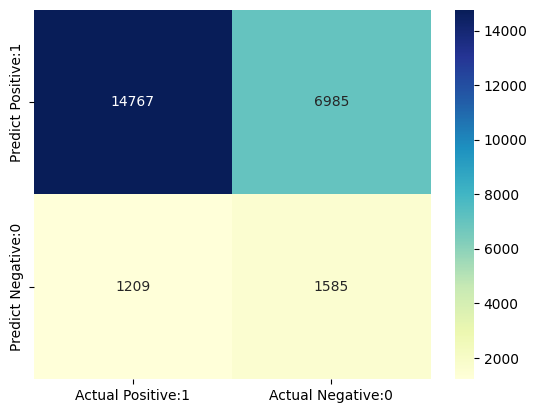

In [44]:
# visualize confusion matrix with seaborn heatmap

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_y)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

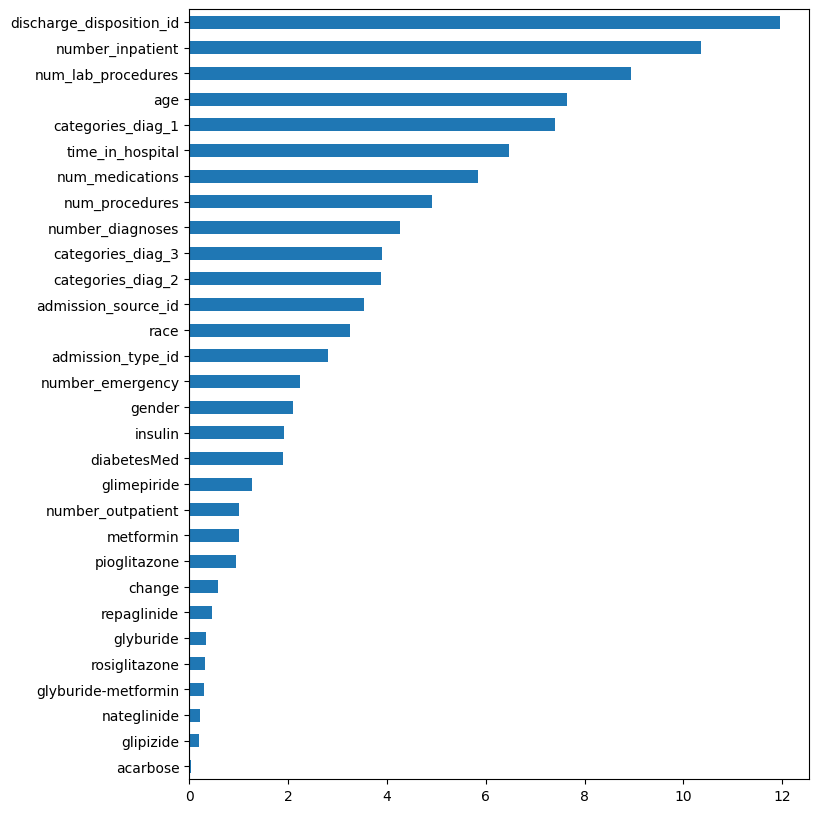

In [45]:
cat_imp = pd.Series(clf_cat.feature_importances_, index=X.columns).sort_values()
cat_imp.plot(kind='barh', figsize=(8, 10))
plt.show()

In [54]:
Predic_all =clf_cat.predict(X)
predicted_pro = clf_cat.predict_proba(X)
Table = pd.DataFrame(predicted_pro, columns=['>30','<30'])
Table['predic'] = Predic_all
Table.sample(10)

,>30,<30,predic
47914,0.386988,0.613012,1
31746,0.444169,0.555831,1
14803,0.386135,0.613865,1
64967,0.544557,0.455443,0
7453,0.616532,0.383468,0
17565,0.419594,0.580406,1
12408,0.399159,0.600841,1
40178,0.588222,0.411778,0
52352,0.580666,0.419334,0
68205,0.441434,0.558566,1


In [32]:
start_time = time.time()


grid = {'learning_rate': [i/10.0 for i in range(0, 5)],
        'max_depth': range(-1, 12, 2),
        'n_estimators': [100,200,300],
        'subsample': [i/10.0 for i in range(6, 10)],
        'l2_leaf_reg': [1, 3, 5]}

catHy = CatBoostClassifier(cat_features=cat_features,
                           class_weights=[weight_0, weight_1],
                           verbose=False)


clfCat = RandomizedSearchCV(estimator=catHy,
                            param_distributions=grid,
                            scoring='accuracy',
                            n_iter=50,
                            verbose=0)

clfCat.fit(X_train, y_train)

print(f'The optimisation takes {(time.time()-start_time)/60.} minutes.')

# Inspect the results
print("Best parameters:", clfCat.best_params_)
print("Score: ", clfCat.best_score_)

KeyboardInterrupt: 

In [31]:
catBest = clfCat.best_params_

clf_cat1 = CatBoostClassifier(**catBest,
                             class_weights=[weight_0, weight_1])

clf_cat1.fit(X_train, y_train,
            cat_features=cat_features,
            eval_set=(X_test, y_test),
            verbose=False)

print(clf_cat.get_best_score())

NameError: name 'clfCat' is not defined

In [60]:
predicted_y = clf_cat1.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
print(metrics.classification_report(y_test, predicted_y))

Accuracy test: 65.50%
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     21752
           1       0.18      0.57      0.27      2794

    accuracy                           0.66     24546
   macro avg       0.55      0.62      0.52     24546
weighted avg       0.84      0.66      0.72     24546

